<h1 style="text-align:center;">Telco Customer Churn Prediction - Machine Learnning Project</h1>

---

<p style="text-align:right"><b>Project Co-creators: Naudeen Stewart, Kun Bi, Flora Wong</b></p>

**Notebook Content:**

**Part 1: Import Necessary Libraries**

**Part 2: Explorative Data Anaylsis**
1. Data Exploration
2. Data Cleanning + Preprocessing
3. Data Anaysis + Visualization
    
**Part 3: Machine Learnning Models**
1.  Logistic Model
2.  KNN Model
3.  Decision Tree Model
4.  Random Forest Model
5.  Support Vector Machine

**Part 4: Best Model + Summary**

# Part 1 : Import Neccessary Libraries

In [4]:
import openpyxl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR,LinearSVR,LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc,roc_curve
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

# Part 2 : Explorative Data Analysis

## Data Exploration

In [7]:
df_flora = pd.read_excel('churn.xlsx')
df_kun = pd.read_excel('churn.xlsx')
df_naudeen = pd.read_excel('churn.xlsx')

In [8]:
df_raw = pd.read_excel('churn.xlsx')
df_raw.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [10]:
# Check unique values and its proportion in each categorical columns
lst = df_raw.select_dtypes("object").columns.to_list()
print(lst)

for l in lst:
    print(df_raw[l].value_counts(normalize=True))

['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Total Charges', 'Churn Label', 'Churn Reason']
CustomerID
3668-QPYBK    0.000142
9169-BSVIN    0.000142
0206-OYVOC    0.000142
6418-HNFED    0.000142
8805-JNRAZ    0.000142
                ...   
6797-UCJHZ    0.000142
5016-IBERQ    0.000142
3003-CMDUU    0.000142
5148-HKFIR    0.000142
3186-AJIEK    0.000142
Name: proportion, Length: 7043, dtype: float64
Country
United States    1.0
Name: proportion, dtype: float64
State
California    1.0
Name: proportion, dtype: float64
City
Los Angeles       0.043305
San Diego         0.021298
San Jose          0.015902
Sacramento        0.015334
San Francisco     0.014766
                    ...   
Healdsburg        0.000568
Jenne

In [11]:
df_raw['State'].unique()           # only one unique value in this column

array(['California'], dtype=object)

In [12]:
df_raw['Count'].unique()          # only one unique value in this column

array([1])

In [13]:
df_raw['Churn Value'].unique()   # 'Churn Value' column has equal meanning with 'Churn Label' column.

array([1, 0])

In [14]:
df_raw['Churn Label'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
df_raw[df_raw['Churn Value'] == 1].head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

In [16]:
df_raw[df_raw['Churn Value'] == 0].head()

CustomerID  Count        Country       State         City  Zip Code  \
1869  7590-VHVEG      1  United States  California  Los Angeles     90001   
1870  5575-GNVDE      1  United States  California  Los Angeles     90002   
1871  7795-CFOCW      1  United States  California  Los Angeles     90004   
1872  1452-KIOVK      1  United States  California  Los Angeles     90007   
1873  6713-OKOMC      1  United States  California  Los Angeles     90008   

                    Lat Long   Latitude   Longitude  Gender  ...  \
1869   33.973616, -118.24902  33.973616 -118.249020  Female  ...   
1870  33.949255, -118.246978  33.949255 -118.246978    Male  ...   
1871  34.076259, -118.310715  34.076259 -118.310715    Male  ...   
1872   34.027337, -118.28515  34.027337 -118.285150    Male  ...   
1873  34.008293, -118.346766  34.008293 -118.346766  Female  ...   

            Contract Paperless Billing             Payment Method  \
1869  Month-to-month               Yes           Electronic check   
1870        One year                No               Mailed check   
1871        One year                No  Bank transfer (automatic)   
1872  Month-to-month               Yes    Credit card (automatic)   
1873  Month-to-month                No               Mailed check   

      Monthly Charges Total Charges Churn Label Churn Value Churn Score  CLTV  \
1869            29.85         29.85          No           0          27  3964   
1870            56.95        1889.5          No           0          61  3441   
1871            42.30       1840.75          No           0          66  4307   
1872            89.10        1949.4          No           0          43  4459   
1873            29.75         301.9          No           0          51  2013   

     Churn Reason  
1869          NaN  
1870          NaN  
1871          NaN  
1872          NaN  
1873          NaN  

[5 rows x 33 columns]

## Data Cleanning + Preprocessing

In [18]:
# Drop irrelevant/ unwanted columns
df = df_raw.drop(['CustomerID','Count','Country','State','City','Zip Code','Lat Long','Latitude','Longitude','Churn Reason','Churn Value' ],axis=1)

In [19]:
df.head()

Gender Senior Citizen Partner Dependents  Tenure Months Phone Service  \
0    Male             No      No         No              2           Yes   
1  Female             No      No        Yes              2           Yes   
2  Female             No      No        Yes              8           Yes   
3  Female             No     Yes        Yes             28           Yes   
4    Male             No      No        Yes             49           Yes   

  Multiple Lines Internet Service Online Security Online Backup  ...  \
0             No              DSL             Yes           Yes  ...   
1             No      Fiber optic              No            No  ...   
2            Yes      Fiber optic              No            No  ...   
3            Yes      Fiber optic              No            No  ...   
4            Yes      Fiber optic              No           Yes  ...   

  Streaming TV Streaming Movies        Contract Paperless Billing  \
0           No               No  Month-to-month               Yes   
1           No               No  Month-to-month               Yes   
2          Yes              Yes  Month-to-month               Yes   
3          Yes              Yes  Month-to-month               Yes   
4          Yes              Yes  Month-to-month               Yes   

              Payment Method Monthly Charges Total Charges  Churn Label  \
0               Mailed check           53.85        108.15          Yes   
1           Electronic check           70.70        151.65          Yes   
2           Electronic check           99.65         820.5          Yes   
3           Electronic check          104.80       3046.05          Yes   
4  Bank transfer (automatic)          103.70        5036.3          Yes   

  Churn Score  CLTV  
0          86  3239  
1          67  2701  
2          86  5372  
3          84  5003  
4          89  5340  

[5 rows x 22 columns]

In [20]:
# Explore Tenure Months 

data_tenure_month = df['Tenure Months'].unique()
data_tenure_month

array([ 2,  8, 28, 49, 10,  1, 47, 17,  5, 34, 11, 15, 18,  9,  7, 12, 25,
       68, 55, 37,  3, 27, 20,  4, 58, 53, 13,  6, 19, 59, 16, 52, 24, 32,
       38, 54, 43, 63, 21, 69, 22, 61, 60, 48, 40, 23, 39, 35, 56, 65, 33,
       30, 45, 46, 62, 70, 50, 44, 71, 26, 14, 41, 66, 64, 29, 42, 67, 51,
       31, 57, 36, 72,  0])

In [22]:
df['Tenure Months'].value_counts()

Tenure Months
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [23]:
# Create label group for in case we need it later
# Define the bin edges
bins = [-1, 0, 12, 24, 36, 48, 60, 72]
labels = ['0', '1-12', '13-24', '25-36', '37-48', '49-60', '61-72']

# Create a new column with binned categories
df['Tenure Group'] = pd.cut(df['Tenure Months'], bins=bins, labels=labels, right=True)

df['Tenure Group'] 

0        1-12
1        1-12
2        1-12
3       25-36
4       49-60
        ...  
7038    61-72
7039    13-24
7040    61-72
7041     1-12
7042    61-72
Name: Tenure Group, Length: 7043, dtype: category
Categories (7, object): ['0' < '1-12' < '13-24' < '25-36' < '37-48' < '49-60' < '61-72']

In [24]:
df.head()

Gender Senior Citizen Partner Dependents  Tenure Months Phone Service  \
0    Male             No      No         No              2           Yes   
1  Female             No      No        Yes              2           Yes   
2  Female             No      No        Yes              8           Yes   
3  Female             No     Yes        Yes             28           Yes   
4    Male             No      No        Yes             49           Yes   

  Multiple Lines Internet Service Online Security Online Backup  ...  \
0             No              DSL             Yes           Yes  ...   
1             No      Fiber optic              No            No  ...   
2            Yes      Fiber optic              No            No  ...   
3            Yes      Fiber optic              No            No  ...   
4            Yes      Fiber optic              No           Yes  ...   

  Streaming Movies        Contract Paperless Billing  \
0               No  Month-to-month               Yes   
1               No  Month-to-month               Yes   
2              Yes  Month-to-month               Yes   
3              Yes  Month-to-month               Yes   
4              Yes  Month-to-month               Yes   

              Payment Method Monthly Charges Total Charges Churn Label  \
0               Mailed check           53.85        108.15         Yes   
1           Electronic check           70.70        151.65         Yes   
2           Electronic check           99.65         820.5         Yes   
3           Electronic check          104.80       3046.05         Yes   
4  Bank transfer (automatic)          103.70        5036.3         Yes   

   Churn Score  CLTV Tenure Group  
0           86  3239         1-12  
1           67  2701         1-12  
2           86  5372         1-12  
3           84  5003        25-36  
4           89  5340        49-60  

[5 rows x 23 columns]

In [25]:
df.isnull().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Score          0
CLTV                 0
Tenure Group         0
dtype: int64

In [26]:
# Explore monthly charge. - the lowest and highest monthly charges
df.sort_values(by='Monthly Charges')

Gender Senior Citizen Partner Dependents  Tenure Months Phone Service  \
4613    Male             No      No         No             28           Yes   
2997  Female             No     Yes         No             59           Yes   
6758    Male             No      No         No             36           Yes   
6945  Female             No     Yes        Yes             25           Yes   
2725  Female             No      No         No             53           Yes   
...      ...            ...     ...        ...            ...           ...   
1347    Male             No      No         No             67           Yes   
5417  Female             No      No         No             61           Yes   
4736  Female             No     Yes         No             68           Yes   
3422  Female             No      No         No             71           Yes   
5251  Female             No     Yes        Yes             72           Yes   

     Multiple Lines Internet Service      Online Security  \
4613             No               No  No internet service   
2997             No               No  No internet service   
6758             No               No  No internet service   
6945             No               No  No internet service   
2725             No               No  No internet service   
...             ...              ...                  ...   
1347            Yes      Fiber optic                  Yes   
5417            Yes      Fiber optic                  Yes   
4736            Yes      Fiber optic                  Yes   
3422            Yes      Fiber optic                  Yes   
5251            Yes      Fiber optic                  Yes   

            Online Backup  ...     Streaming Movies  Contract  \
4613  No internet service  ...  No internet service  One year   
2997  No internet service  ...  No internet service  Two year   
6758  No internet service  ...  No internet service  Two year   
6945  No internet service  ...  No internet service  Two year   
2725  No internet service  ...  No internet service  Two year   
...                   ...  ...                  ...       ...   
1347                  Yes  ...                  Yes  One year   
5417                  Yes  ...                  Yes  One year   
4736                  Yes  ...                  Yes  Two year   
3422                  Yes  ...                  Yes  Two year   
5251                  Yes  ...                  Yes  Two year   

     Paperless Billing             Payment Method Monthly Charges  \
4613                No    Credit card (automatic)           18.25   
2997                No  Bank transfer (automatic)           18.40   
6758               Yes    Credit card (automatic)           18.55   
6945               Yes               Mailed check           18.70   
2725                No               Mailed check           18.70   
...                ...                        ...             ...   
1347               Yes  Bank transfer (automatic)          118.35   
5417               Yes           Electronic check          118.60   
4736                No               Mailed check          118.60   
3422               Yes           Electronic check          118.65   
5251               Yes  Bank transfer (automatic)          118.75   

     Total Charges Churn Label  Churn Score  CLTV Tenure Group  
4613         534.7          No           67  5327        25-36  
2997       1057.85          No           20  4375        49-60  
6758           689          No           28  5703        25-36  
6945        383.65          No           42  2289        25-36  
2725        1005.7          No           54  4116        49-60  
...            ...         ...          ...   ...          ...  
1347       7804.15         Yes           91  6255        61-72  
5417        7365.7          No           76  5536        61-72  
4736       7990.05          No           38  4175        61-72  
3422        8477.6          No           73  4296        61-72  

In [28]:
df.describe()

Tenure Months  Monthly Charges  Churn Score         CLTV
count    7043.000000      7043.000000  7043.000000  7043.000000
mean       32.371149        64.761692    58.699418  4400.295755
std        24.559481        30.090047    21.525131  1183.057152
min         0.000000        18.250000     5.000000  2003.000000
25%         9.000000        35.500000    40.000000  3469.000000
50%        29.000000        70.350000    61.000000  4527.000000
75%        55.000000        89.850000    75.000000  5380.500000
max        72.000000       118.750000   100.000000  6500.000000

## Data Visualisation 

<Axes: xlabel='count', ylabel='Churn Label'>

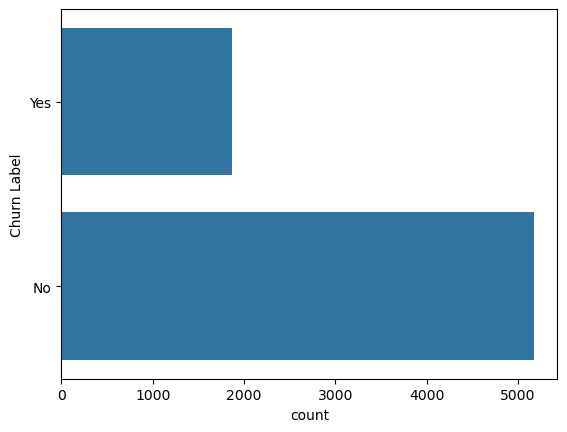

In [30]:
sns.countplot(df['Churn Label'])

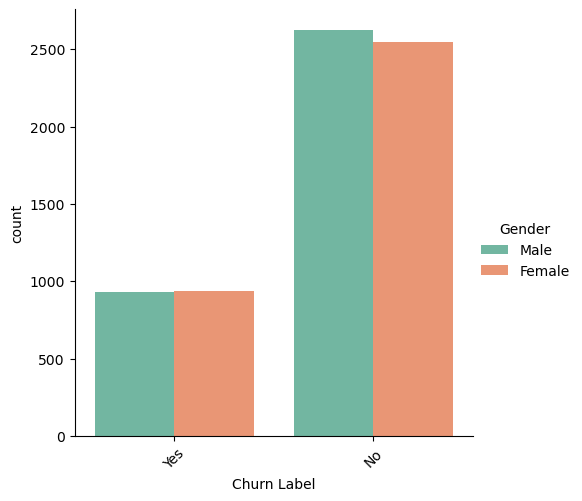

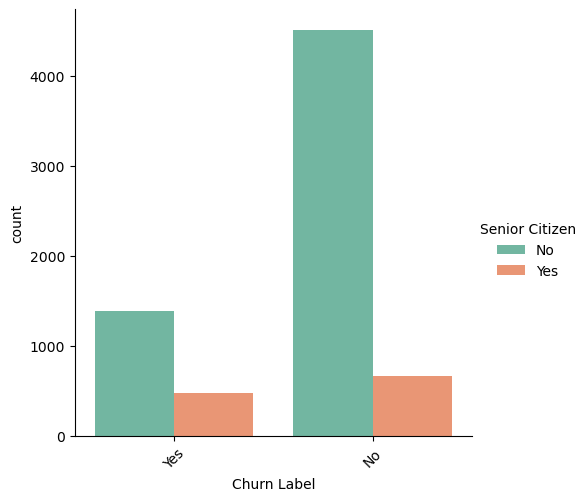

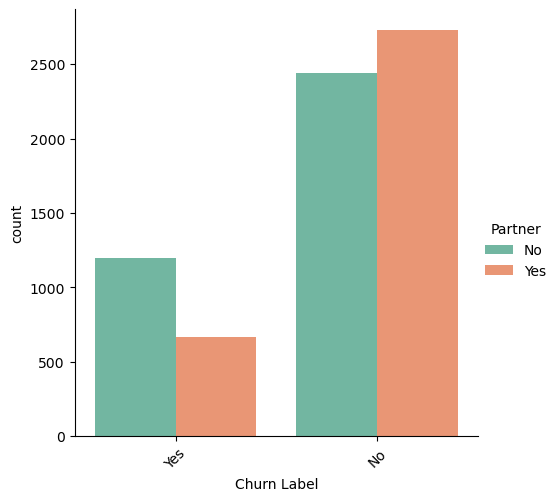

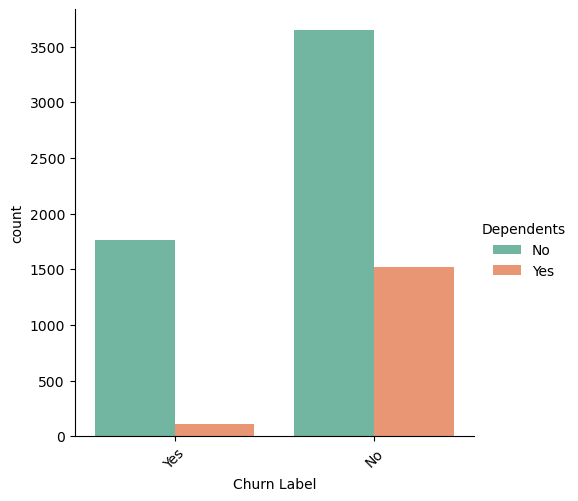

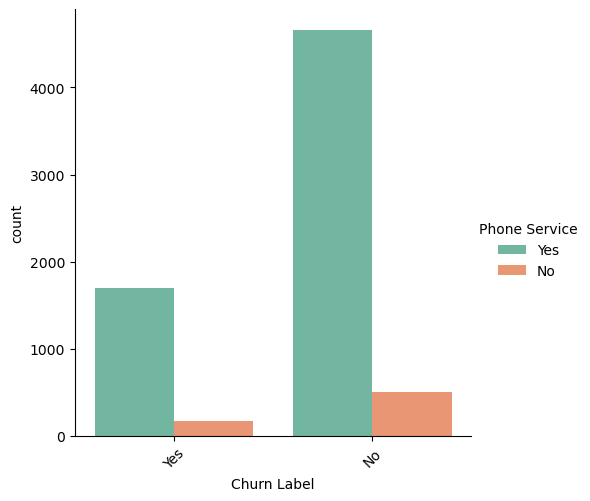

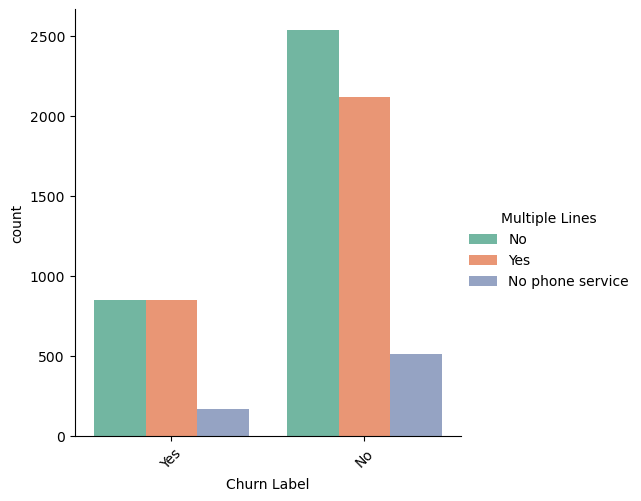

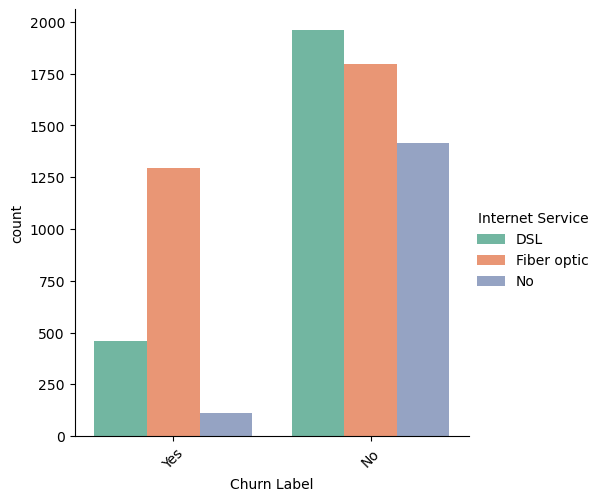

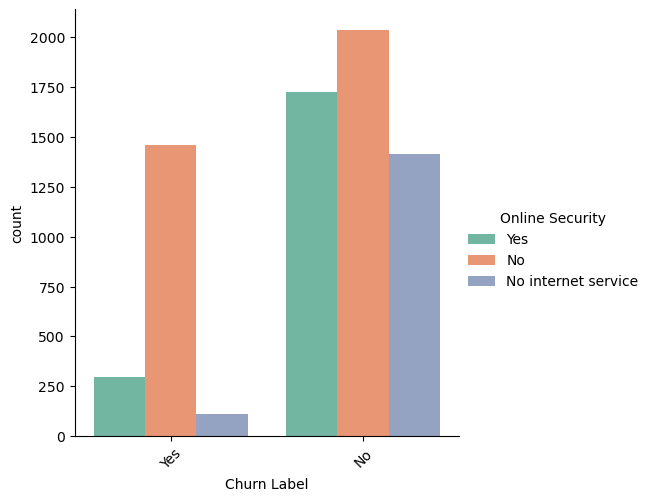

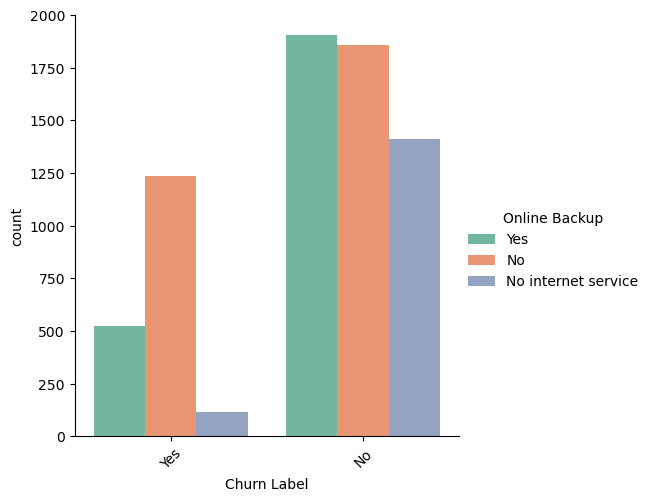

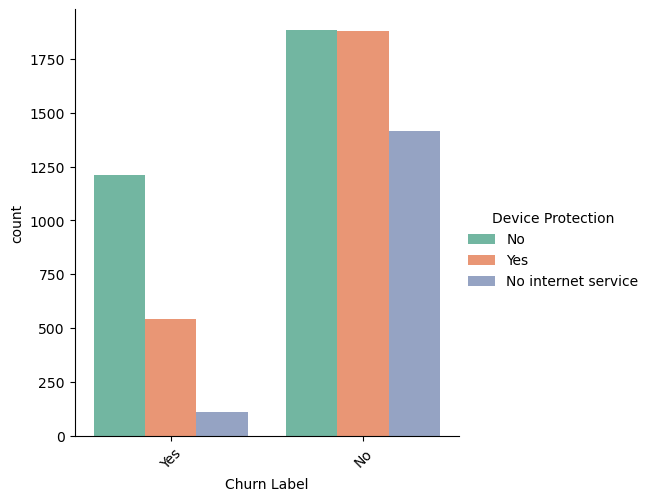

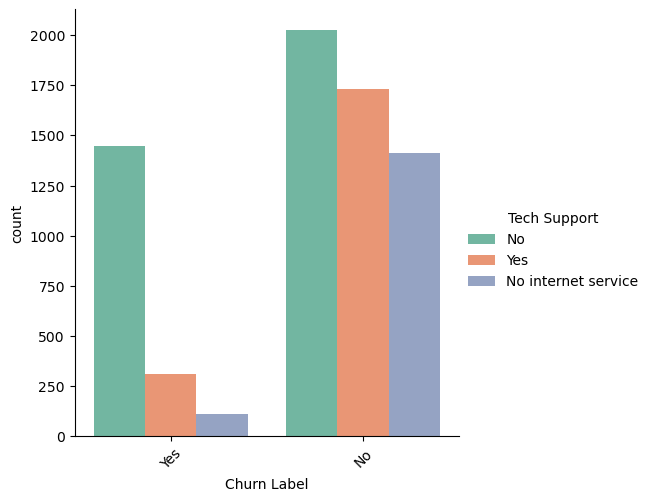

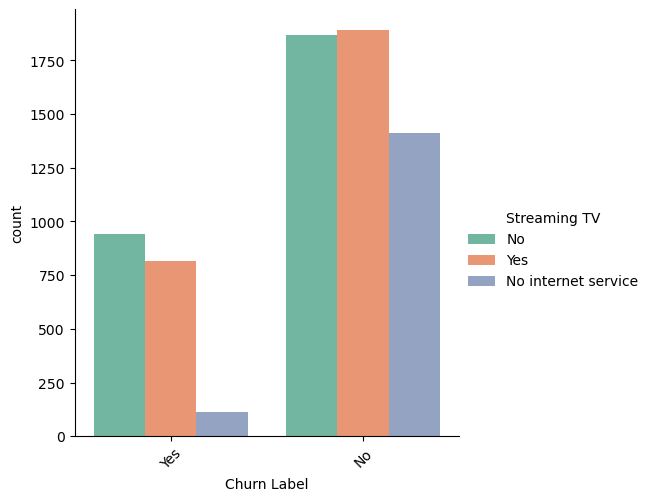

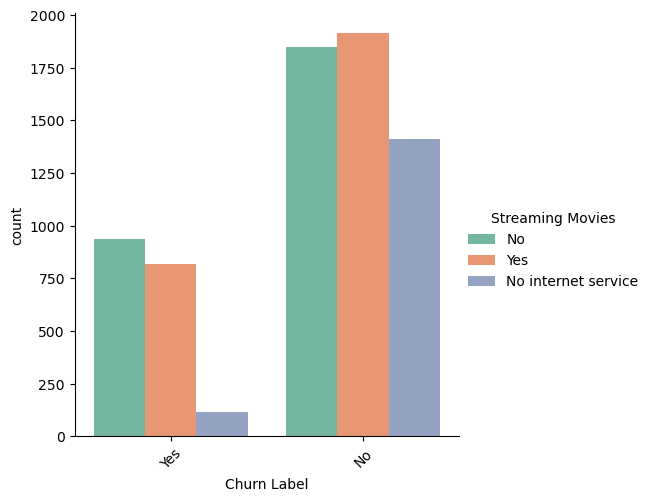

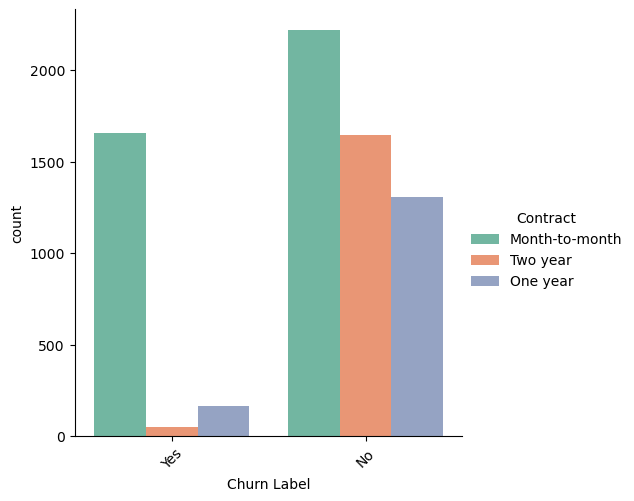

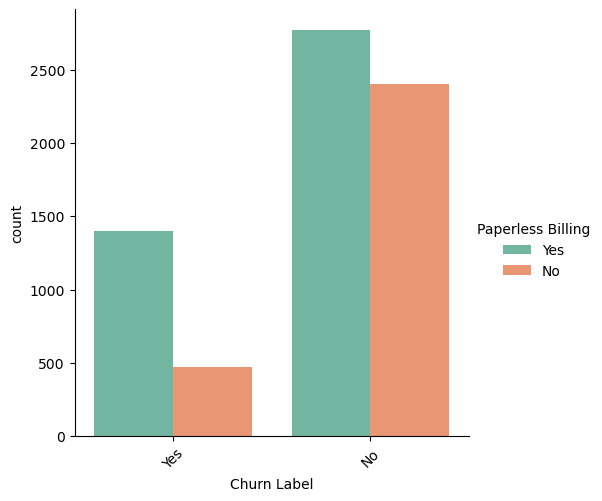

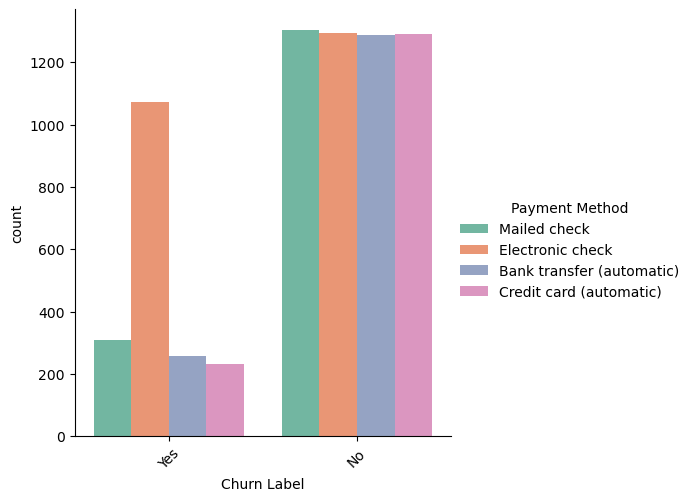

/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


ValueError: Image size of 610x136833 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 607.625x500 with 1 Axes>

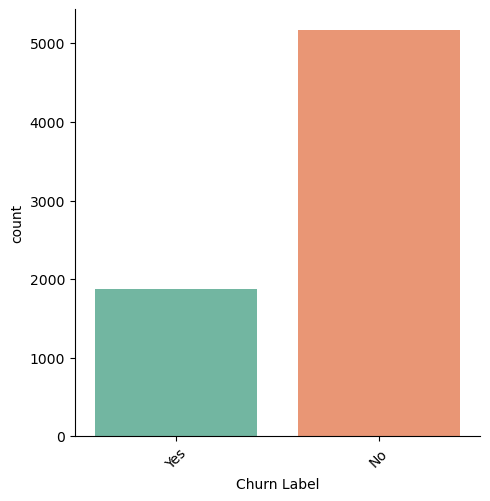

In [31]:
# bar plots showing the count of churn labels (Yes or No) segmented by each categorical feature.
for col in df.select_dtypes("object"):
    sns.catplot(data=df,x='Churn Label',kind="count",hue=col,palette="Set2")
    plt.xticks(rotation=45)
    plt.show()
    plt.close()

In [32]:
df['Churn Score'].unique()

array([ 86,  67,  84,  89,  78, 100,  92,  77,  97,  74,  66,  65,  70,
        90,  82,  69,  81,  96,  87,  88,  75,  76,  95,  99,  80,  73,
        94,  83,  98,  71,  85,  68,  91,  93,  72,  79,  27,  61,  43,
        51,  58,  39,  35,  57,  53,  21,  38,  40,  41,  22,  25,  64,
        49,  62,  52,  59,  29,  33,  20,  30,  26,  54,  56,  55,  28,
        37,   9,  60,  24,  63,  23,  47,  32,   8,  46,  42,  48,  36,
        34,   7,  50,  44,  31,   5,  45])

In [1]:
# Look at the type of dataframe. # Total Charge - Object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             7043 non-null   object  
 1   Senior Citizen     7043 non-null   object  
 2   Partner            7043 non-null   object  
 3   Dependents         7043 non-null   object  
 4   Tenure Months      7043 non-null   int64   
 5   Phone Service      7043 non-null   object  
 6   Multiple Lines     7043 non-null   object  
 7   Internet Service   7043 non-null   object  
 8   Online Security    7043 non-null   object  
 9   Online Backup      7043 non-null   object  
 10  Device Protection  7043 non-null   object  
 11  Tech Support       7043 non-null   object  
 12  Streaming TV       7043 non-null   object  
 13  Streaming Movies   7043 non-null   object  
 14  Contract           7043 non-null   object  
 15  Paperless Billing  7043 non-null   object  
 16  Paymen

In [34]:
# Create another dataframe copied from the cleaned df, and get dummpies on categorical values.
df2 = df

In [35]:
df2['Total Charges'] = pd.to_numeric(df2['Total Charges'], errors='coerce')

In [36]:
df2.isnull().sum()

Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Score           0
CLTV                  0
Tenure Group          0
dtype: int64

In [37]:
df2['Total Charges'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: Total Charges, Length: 7043, dtype: bool

In [38]:
df2 = df2.dropna()   # drop null values

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             7032 non-null   object  
 1   Senior Citizen     7032 non-null   object  
 2   Partner            7032 non-null   object  
 3   Dependents         7032 non-null   object  
 4   Tenure Months      7032 non-null   int64   
 5   Phone Service      7032 non-null   object  
 6   Multiple Lines     7032 non-null   object  
 7   Internet Service   7032 non-null   object  
 8   Online Security    7032 non-null   object  
 9   Online Backup      7032 non-null   object  
 10  Device Protection  7032 non-null   object  
 11  Tech Support       7032 non-null   object  
 12  Streaming TV       7032 non-null   object  
 13  Streaming Movies   7032 non-null   object  
 14  Contract           7032 non-null   object  
 15  Paperless Billing  7032 non-null   object  
 16  Payment Met

In [40]:
df_dummies = pd.get_dummies(df2.drop('Tenure Group',axis=1), drop_first=True)

In [41]:
df_dummies

Tenure Months  Monthly Charges  Total Charges  Churn Score  CLTV  \
0                 2            53.85         108.15           86  3239   
1                 2            70.70         151.65           67  2701   
2                 8            99.65         820.50           86  5372   
3                28           104.80        3046.05           84  5003   
4                49           103.70        5036.30           89  5340   
...             ...              ...            ...          ...   ...   
7038             72            21.15        1419.40           45  5306   
7039             24            84.80        1990.50           59  2140   
7040             72           103.20        7362.90           71  5560   
7041             11            29.60         346.45           59  2793   
7042             66           105.65        6844.50           38  5097   

      Gender_Male  Senior Citizen_Yes  Partner_Yes  Dependents_Yes  \
0            True               False        False           False   
1           False               False        False            True   
2           False               False        False            True   
3           False               False         True            True   
4            True               False        False            True   
...           ...                 ...          ...             ...   
7038        False               False        False           False   
7039         True               False         True            True   
7040        False               False         True            True   
7041        False               False         True            True   
7042         True               False        False           False   

      Phone Service_Yes  ...  Streaming TV_Yes  \
0                  True  ...             False   
1                  True  ...             False   
2                  True  ...              True   
3                  True  ...              True   
4                  True  ...              True   
...                 ...  ...               ...   
7038               True  ...             False   
7039               True  ...              True   
7040               True  ...              True   
7041              False  ...             False   
7042               True  ...              True   

      Streaming Movies_No internet service  Streaming Movies_Yes  \
0                                    False                 False   
1                                    False                 False   
2                                    False                  True   
3                                    False                  True   
4                                    False                  True   
...                                    ...                   ...   
7038                                  True                 False   
7039                                 False                  True   
7040                                 False                  True   
7041                                 False                 False   
7042                                 False                  True   

      Contract_One year  Contract_Two year  Paperless Billing_Yes  \
0                 False              False                   True   
1                 False              False                   True   
2                 False              False                   True   
3                 False              False                   True   
4                 False              False                   True   
...                 ...                ...                    ...   
7038              False               True                   True   
7039               True              False                   True   
7040               True              False                   True   
7041              False              False                   True   
7042              False               True                   True   

      Payment Method_Credit c

In [42]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Tenure Months                           7032 non-null   int64  
 1   Monthly Charges                         7032 non-null   float64
 2   Total Charges                           7032 non-null   float64
 3   Churn Score                             7032 non-null   int64  
 4   CLTV                                    7032 non-null   int64  
 5   Gender_Male                             7032 non-null   bool   
 6   Senior Citizen_Yes                      7032 non-null   bool   
 7   Partner_Yes                             7032 non-null   bool   
 8   Dependents_Yes                          7032 non-null   bool   
 9   Phone Service_Yes                       7032 non-null   bool   
 10  Multiple Lines_No phone service         7032 non-null   bool   
 

In [43]:
correlation_matrix_eda = df_dummies.corr()   # check correlation
correlation_matrix_eda

Tenure Months  Monthly Charges  \
Tenure Months                                1.000000         0.246862   
Monthly Charges                              0.246862         1.000000   
Total Charges                                0.825880         0.651065   
Churn Score                                 -0.226379         0.133556   
CLTV                                         0.396188         0.098565   
Gender_Male                                  0.005285        -0.013779   
Senior Citizen_Yes                           0.015683         0.219874   
Partner_Yes                                  0.381912         0.097825   
Dependents_Yes                               0.133773        -0.142926   
Phone Service_Yes                            0.007877         0.248033   
Multiple Lines_No phone service             -0.007877        -0.248033   
Multiple Lines_Yes                           0.332399         0.490912   
Internet Service_Fiber optic                 0.017930         0.787195   
Internet Service_No                         -0.037529        -0.763191   
Online Security_No internet service         -0.037529        -0.763191   
Online Security_Yes                          0.328297         0.296447   
Online Backup_No internet service           -0.037529        -0.763191   
Online Backup_Yes                            0.361138         0.441529   
Device Protection_No internet service       -0.037529        -0.763191   
Device Protection_Yes                        0.361520         0.482607   
Tech Support_No internet service            -0.037529        -0.763191   
Tech Support_Yes                             0.325288         0.338301   
Streaming TV_No internet service            -0.037529        -0.763191   
Streaming TV_Yes                             0.280264         0.629668   
Streaming Movies_No internet service        -0.037529        -0.763191   
Streaming Movies_Yes                         0.285402         0.627235   
Contract_One year                            0.202338         0.004810   
Contract_Two year                            0.563801        -0.073256   
Paperless Billing_Yes                        0.004823         0.351930   
Payment Method_Credit card (automatic)       0.232800         0.030055   
Payment Method_Electronic check             -0.210197         0.271117   
Payment Method_Mailed check                 -0.232181        -0.376568   
Churn Label_Yes                             -0.354049         0.192858   

                                        Total Charges  Churn Score      CLTV  \
Tenure Months                                0.825880    -0.226379  0.396188   
Monthly Charges                              0.651065     0.133556  0.098565   
Total Charges                                1.000000    -0.124312  0.341837   
Churn Score                                 -0.124312     1.000000 -0.080837   
CLTV                                         0.341837    -0.080837  1.000000   
Gender_Male                                  0.000048    -0.000431 -0.007473   
Senior Citizen_Yes                           0.102411     0.101922 -0.003600   
Partner_Yes                                  0.319072    -0.110188  0.139616   
Dependents_Yes                               0.032184    -0.174869  0.059397   
Phone Service_Yes                            0.113008     0.023274  0.022792   
Multiple Lines_No phone service             -0.113008    -0.023274 -0.022792   
Multiple Lines_Yes                           0.469042     0.043061  0.133703   
Internet Service_Fiber optic                 0.360769     0.208264  0.010318   
Internet Service_No                         -0.374878    -0.145627 -0.011196   
Online Security_No internet service         -0.374878    -0.145627 -0.011196   
Online Security_Yes                          0.412619    -0.118814  0.138858   
Online Backup_No internet service           -0.374878    -0.145627 -0.011196   
Online Backup_Yes                            0.510100    -0.046769  0.139031   
Dev

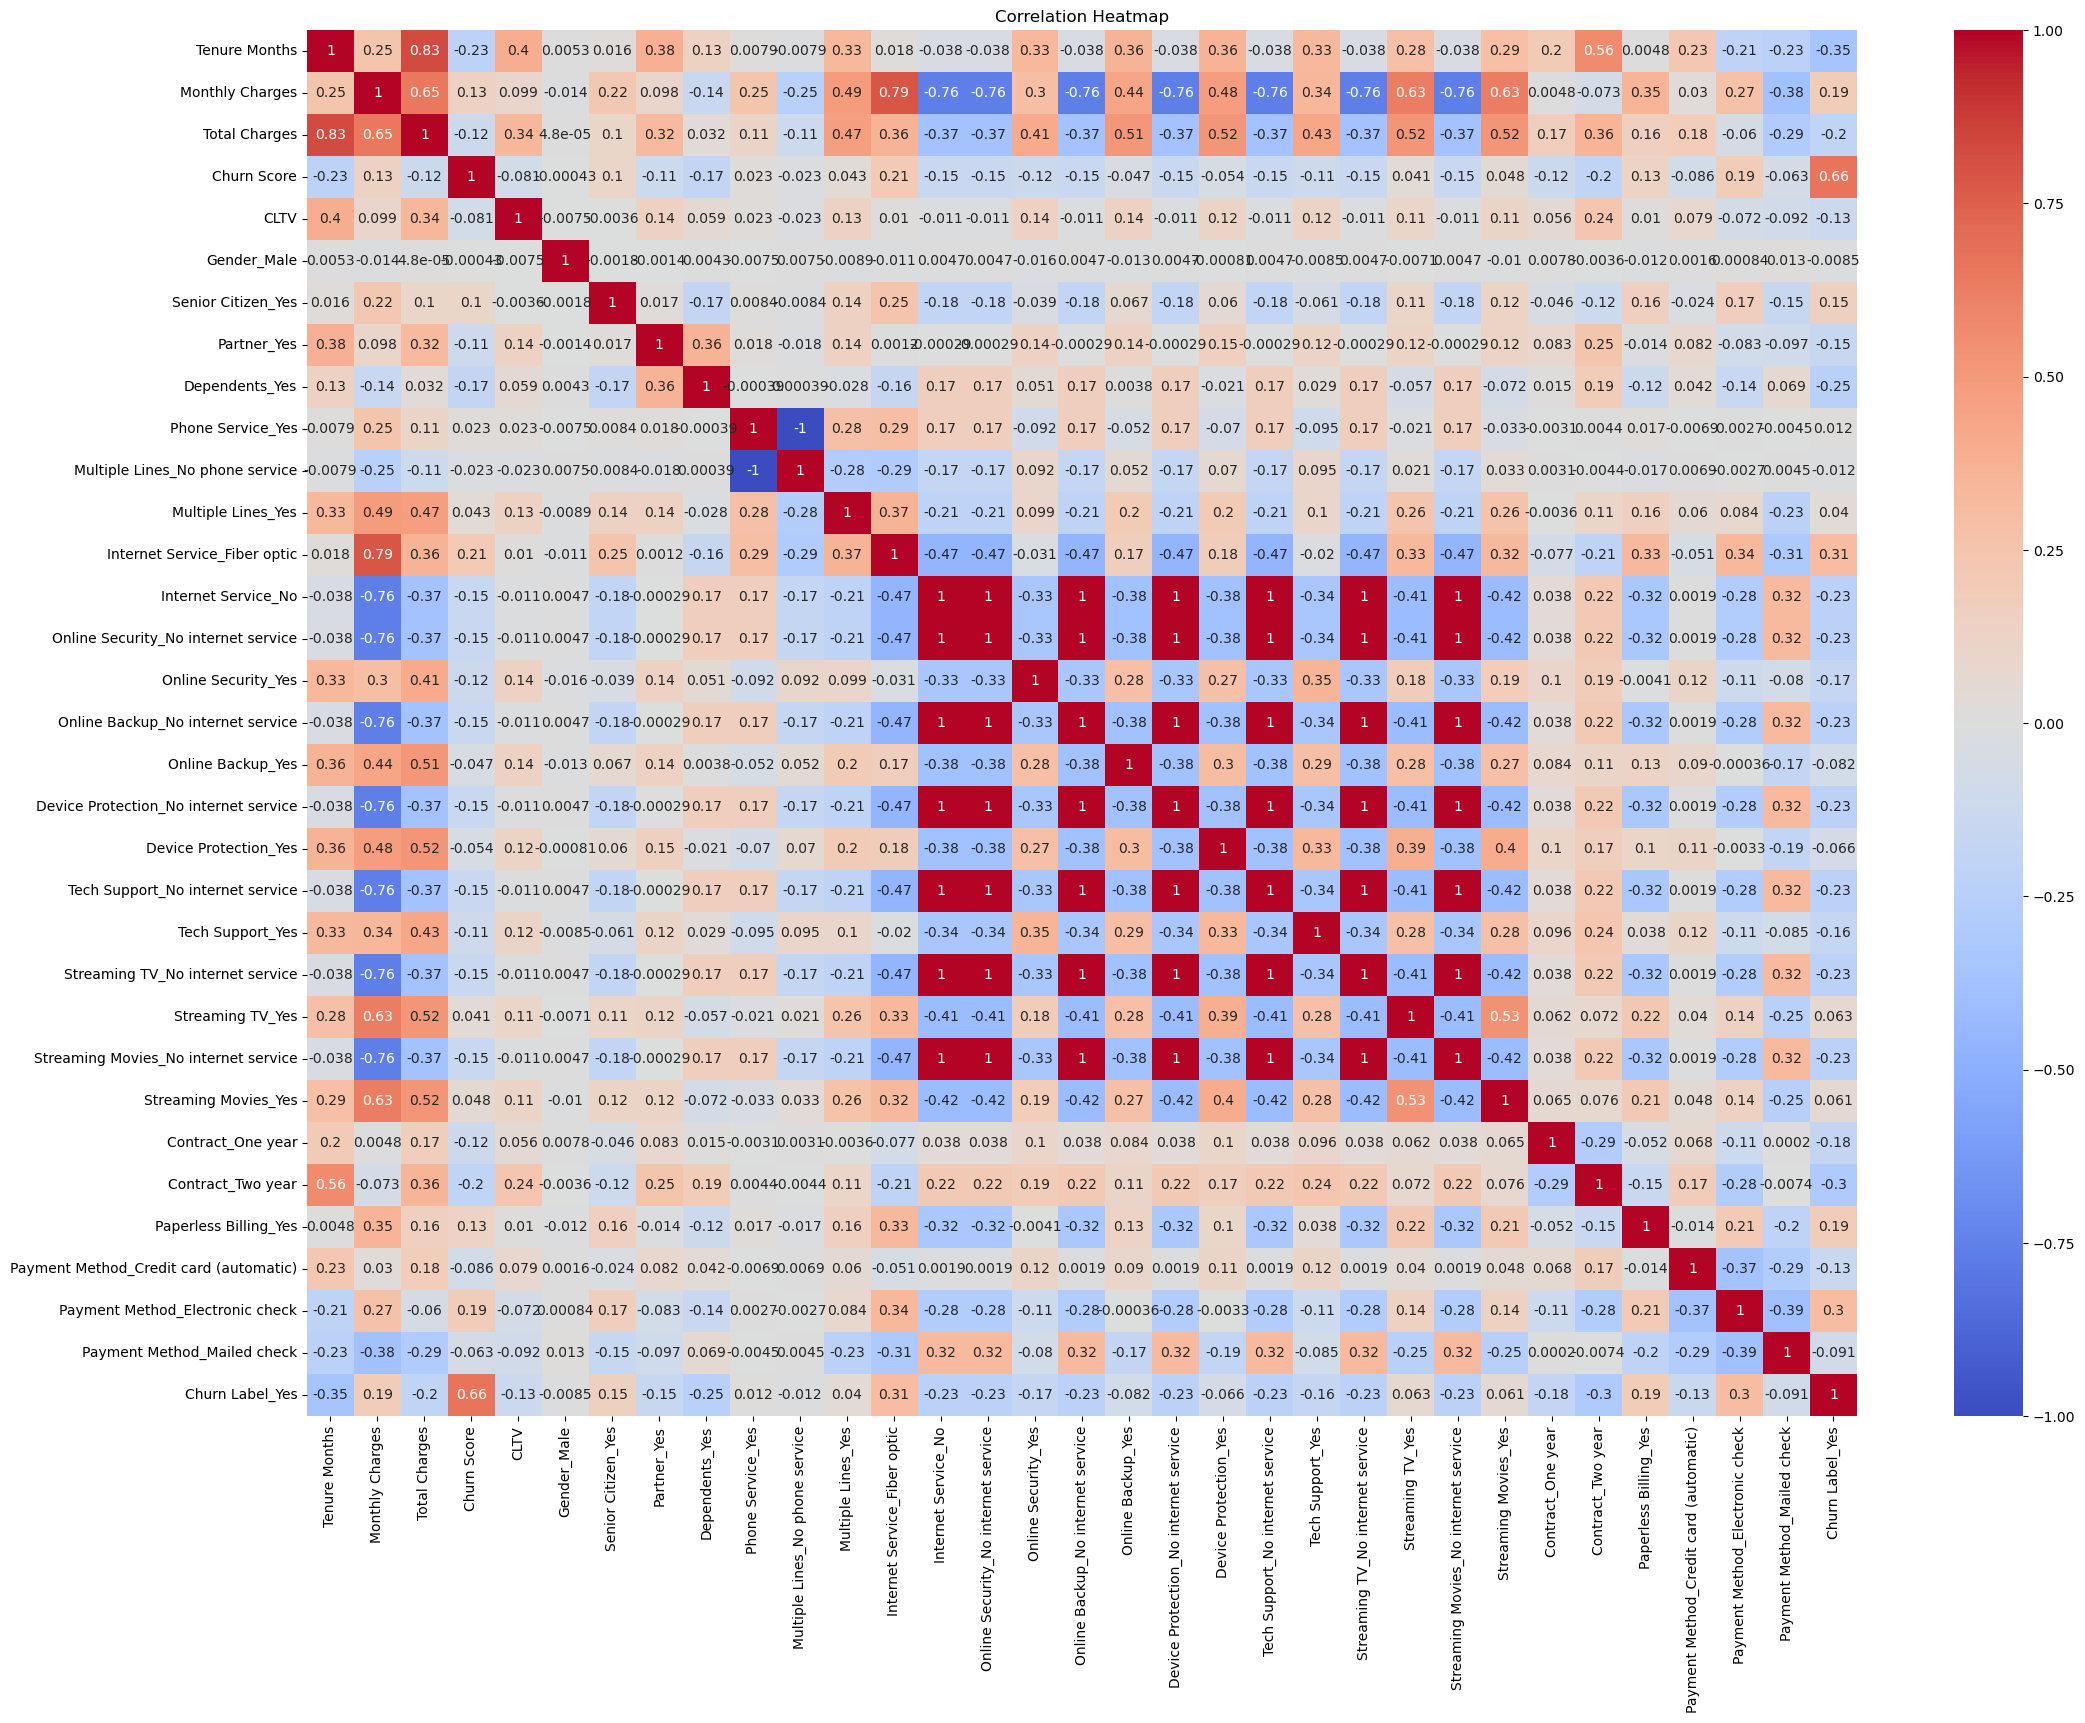

In [44]:
plt.figure(figsize=(25, 18))
sns.heatmap(correlation_matrix_eda, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

High Correlation with Churn Label include:
- Churn Score (0.66)
- Tenure Months (0.35)
- Payment Method_Electronic check(0.3)
- Contract_Two year(-0.3)
- Internet Service_Fiber optic (0.31)
- Internet Service_No(-0.23)
- Online Security_No internet service(-0.23)
- Device Protection_No internet service (-0.23)
- Tech Support_No internet service(-0.23)
- Monthly Charges(0.19)
- Paperless Billing(0.19)

Least Correlation with Churn Label include:
- Gender_Male (-0.0085)

# Part 3. Machine Learnning Models

In the following, there would be creation of different models based on 5 major machine learnning models, namely Logistic Model, KNN Model, Decision Tree Model, Random Forest Model, Support Vector Machine (SVC). For each model, it would have its own feature selection based on different formulas and reasons. <br></br>Also, we would explore models both with 'Churn Score' + without 'Churn Score'. (As according to official documentation, 'Churn Score' is built by another model, so it is not sure that if this data is available or not when predicting churn in the future. Therefore, we would explore ML models with + without 'Churn Score'. Plus, different feature combinations would be explored. <br></br>After that, we would evaluate each model's performance and make a prediction, in order to select the best one.

#  1. Logistic Model

#### Naudeen Data Frame Specific cleaning

In [50]:
df_naudeen = pd.read_excel('churn.xlsx')

In [51]:
df_naudeen = df_naudeen.drop(columns=['CustomerID','Count', 'Country','State','Zip Code', 'Lat Long','Latitude','Longitude','Churn Reason'])

In [52]:
df_naudeen['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df_naudeen = df_naudeen.dropna()
df_naudeen = df_naudeen.drop(['City','Gender','Churn Label'],axis=1)

#### Naudeen Model Feature Selection (Logistic & KNN)

In [54]:
# First lets examine the Numeric Features

# Correlation
correlation_matrix = df_naudeen.corr(numeric_only=True)

# Display correlation between numeric features and the 'Churn Value' column
Churn_correlation = correlation_matrix['Churn Value'].sort_values(ascending=False)
print(Churn_correlation)

Churn Value        1.000000
Churn Score        0.664970
Monthly Charges    0.192858
CLTV              -0.128253
Total Charges     -0.199484
Tenure Months     -0.354049
Name: Churn Value, dtype: float64


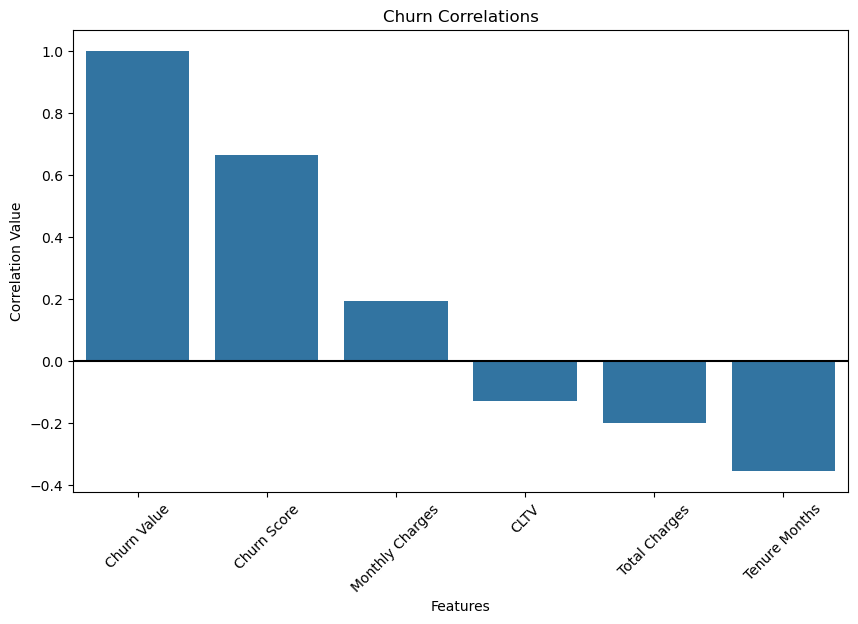

In [55]:
# Correlation barplot

plt.figure(figsize=(10, 6))
sns.barplot(x=Churn_correlation.index, y=Churn_correlation.values)
plt.title('Churn Correlations')
plt.xticks(rotation=45) 
plt.ylabel('Correlation Value')
plt.xlabel('Features')
plt.axhline(0, color= 'black', linewidth=1.5)
plt.show()

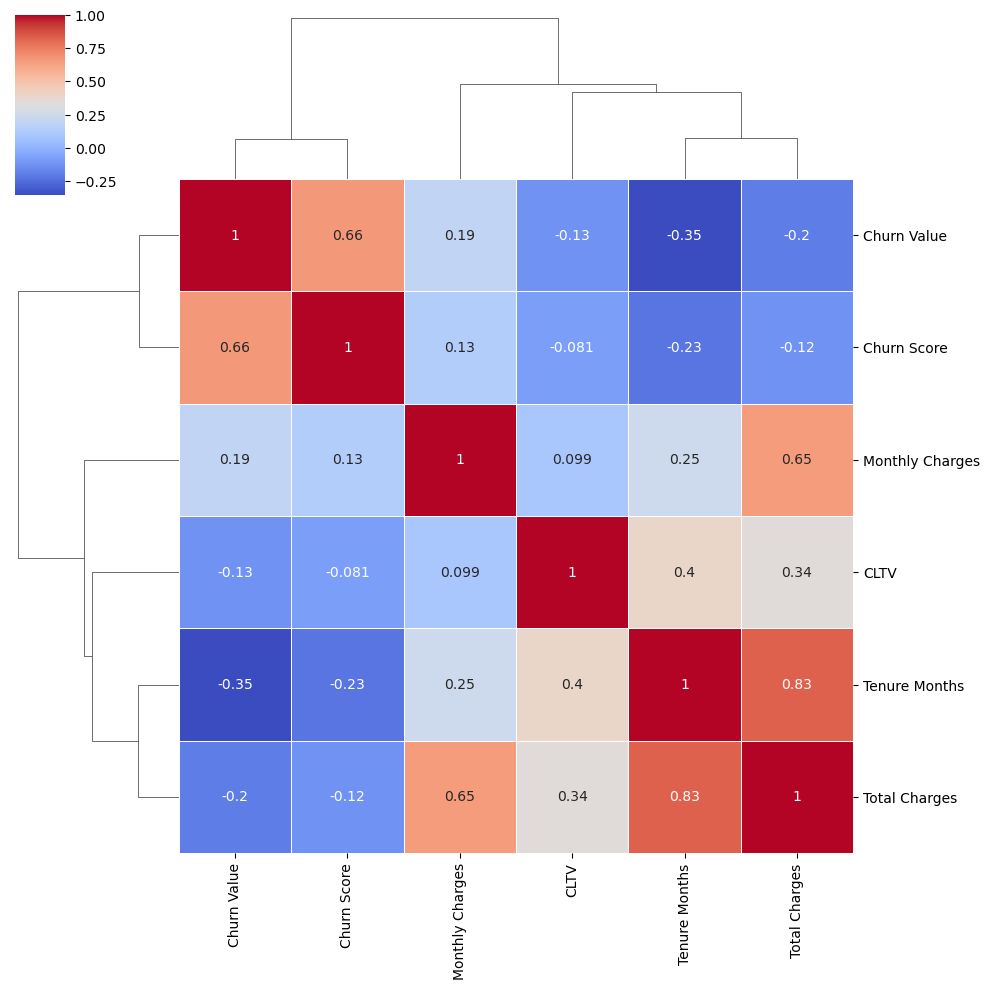

In [56]:
# Clustermap
sns.clustermap(correlation_matrix, cmap='coolwarm', annot=True, linewidth=.5)
plt.show()

In [57]:
# We will keep all numerical Features for the next two models, now lets look at categorical Features

# so many, want to see if we can narrow down by importance, use chi2 score to judge

#encode with dummies
df_enc = pd.get_dummies(df_naudeen, columns=['Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method'], drop_first=True)
df_enc = df_enc.drop(['Churn Score', 'Monthly Charges','CLTV','Total Charges','Tenure Months'],axis=1)
df_enc.shape

(7032, 27)

In [58]:
from sklearn.feature_selection import SelectKBest, chi2

X_try = df_enc.drop(['Churn Value'],axis=1)
y_try = df_enc['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(X_try, y_try, test_size = 0.2, random_state = 1)

# Initialize SelectKBest with chi2, choose top 5 features
selector = SelectKBest(score_func=chi2, k=5)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X_try.columns)

In [59]:
# View top 5 features
print(selected_features)

['Dependents_Yes' 'Internet Service_Fiber optic'
 'Streaming Movies_No internet service' 'Contract_Two year'
 'Payment Method_Electronic check']


In [60]:
chi_scores= chi2(X_try,y_try)
chi_scores

(array([1.33482766e+02, 8.18577694e+01, 3.33236458e+02, 9.29483891e-02,
        8.68247305e-01, 6.51465136e+00, 3.72082851e+02, 2.85475152e+02,
        2.85475152e+02, 1.47165601e+02, 2.85475152e+02, 3.12098318e+01,
        2.85475152e+02, 2.02160070e+01, 2.85475152e+02, 1.35439602e+02,
        2.85475152e+02, 1.73206148e+01, 2.85475152e+02, 1.59306111e+01,
        1.76608724e+02, 4.86223101e+02, 1.04979224e+02, 9.99725387e+01,
        4.24113152e+02, 4.47251434e+01]),
 array([7.08954608e-031, 1.46240915e-019, 1.89623759e-074, 7.60461827e-001,
        3.51440986e-001, 1.06989295e-002, 6.58713045e-083, 4.81399951e-064,
        4.81399951e-064, 7.21988253e-034, 4.81399951e-064, 2.31590182e-008,
        4.81399951e-064, 6.91717063e-006, 4.81399951e-064, 2.64595220e-031,
        4.81399951e-064, 3.15742928e-005, 4.81399951e-064, 6.57073922e-005,
        2.66631661e-040, 9.45428638e-108, 1.23423173e-024, 1.54524820e-023,
        3.10584857e-094, 2.26727030e-011]))

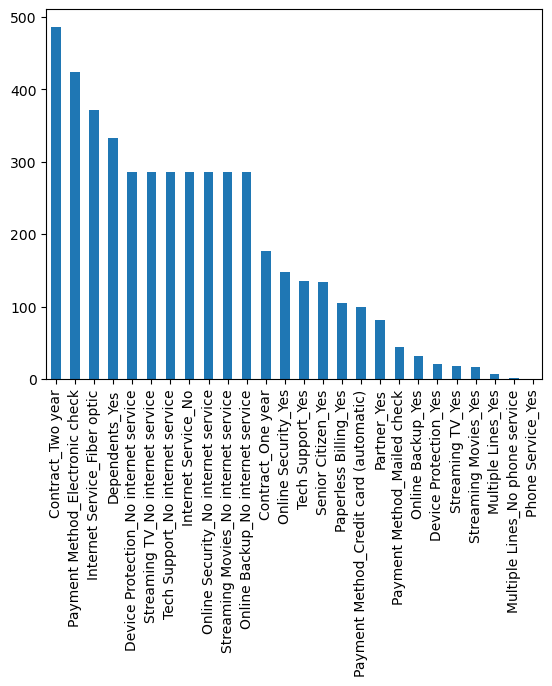

In [61]:
#higher the chi value. higher the importance

chi_values = pd.Series(chi_scores[0], index=X_try.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()
plt.show()

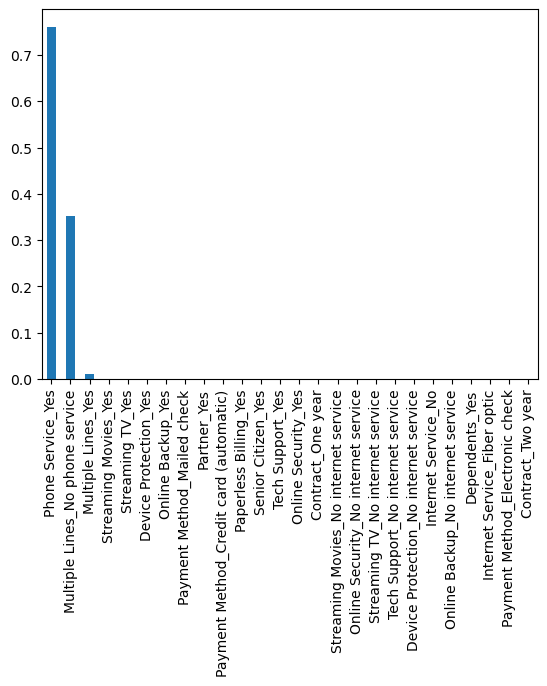

In [62]:
#higher the p value. lower the importance

p_values = pd.Series(chi_scores[1], index=X_try.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()
plt.show()

In [63]:
# For next two models we will use Numerical Features
# and just 5 categorical Features('Dependents', 'Internet Service', 'Streaming Movies', 'Contract', 'Payment Method'

relevant_features = df_naudeen.drop(['Phone Service', 'Multiple Lines', 'Senior Citizen','Partner','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Paperless Billing'],axis=1)

In [64]:
relevant_features.head(1)

Dependents  Tenure Months Internet Service Streaming Movies        Contract  \
0         No              2              DSL               No  Month-to-month   

  Payment Method  Monthly Charges  Total Charges  Churn Value  Churn Score  \
0   Mailed check            53.85         108.15            1           86   

   CLTV  
0  3239

In [65]:
# Encode categorical features this time with OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False)

encoded_cols_naudeen = encoder.fit_transform(relevant_features[['Dependents','Internet Service','Streaming Movies','Contract','Payment Method']])

In [66]:
# get_feature_names_out() returns the transformed feature names
rf_enc = pd.DataFrame(encoded_cols_naudeen, columns = encoder.get_feature_names_out(['Dependents','Internet Service','Streaming Movies','Contract','Payment Method']))

In [67]:
rf_enc.head(1)

Dependents_Yes  Internet Service_Fiber optic  Internet Service_No  \
0             0.0                           0.0                  0.0   

   Streaming Movies_No internet service  Streaming Movies_Yes  \
0                                   0.0                   0.0   

   Contract_One year  Contract_Two year  \
0                0.0                0.0   

   Payment Method_Credit card (automatic)  Payment Method_Electronic check  \
0                                     0.0                              0.0   

   Payment Method_Mailed check  
0                          1.0

In [68]:
modelling_df = relevant_features.drop(columns=['Dependents','Internet Service','Streaming Movies','Contract','Payment Method']).reset_index(drop=True).join(rf_enc)

In [69]:
modelling_df.head(1)

Tenure Months  Monthly Charges  Total Charges  Churn Value  Churn Score  \
0              2            53.85         108.15            1           86   

   CLTV  Dependents_Yes  Internet Service_Fiber optic  Internet Service_No  \
0  3239             0.0                           0.0                  0.0   

   Streaming Movies_No internet service  Streaming Movies_Yes  \
0                                   0.0                   0.0   

   Contract_One year  Contract_Two year  \
0                0.0                0.0   

   Payment Method_Credit card (automatic)  Payment Method_Electronic check  \
0                                     0.0                              0.0   

   Payment Method_Mailed check  
0                          1.0

In [70]:
modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Tenure Months                           7032 non-null   int64  
 1   Monthly Charges                         7032 non-null   float64
 2   Total Charges                           7032 non-null   float64
 3   Churn Value                             7032 non-null   int64  
 4   Churn Score                             7032 non-null   int64  
 5   CLTV                                    7032 non-null   int64  
 6   Dependents_Yes                          7032 non-null   float64
 7   Internet Service_Fiber optic            7032 non-null   float64
 8   Internet Service_No                     7032 non-null   float64
 9   Streaming Movies_No internet service    7032 non-null   float64
 10  Streaming Movies_Yes                    7032 non-null   floa

## 1.1. Building Logistic Model (With Churn Score)

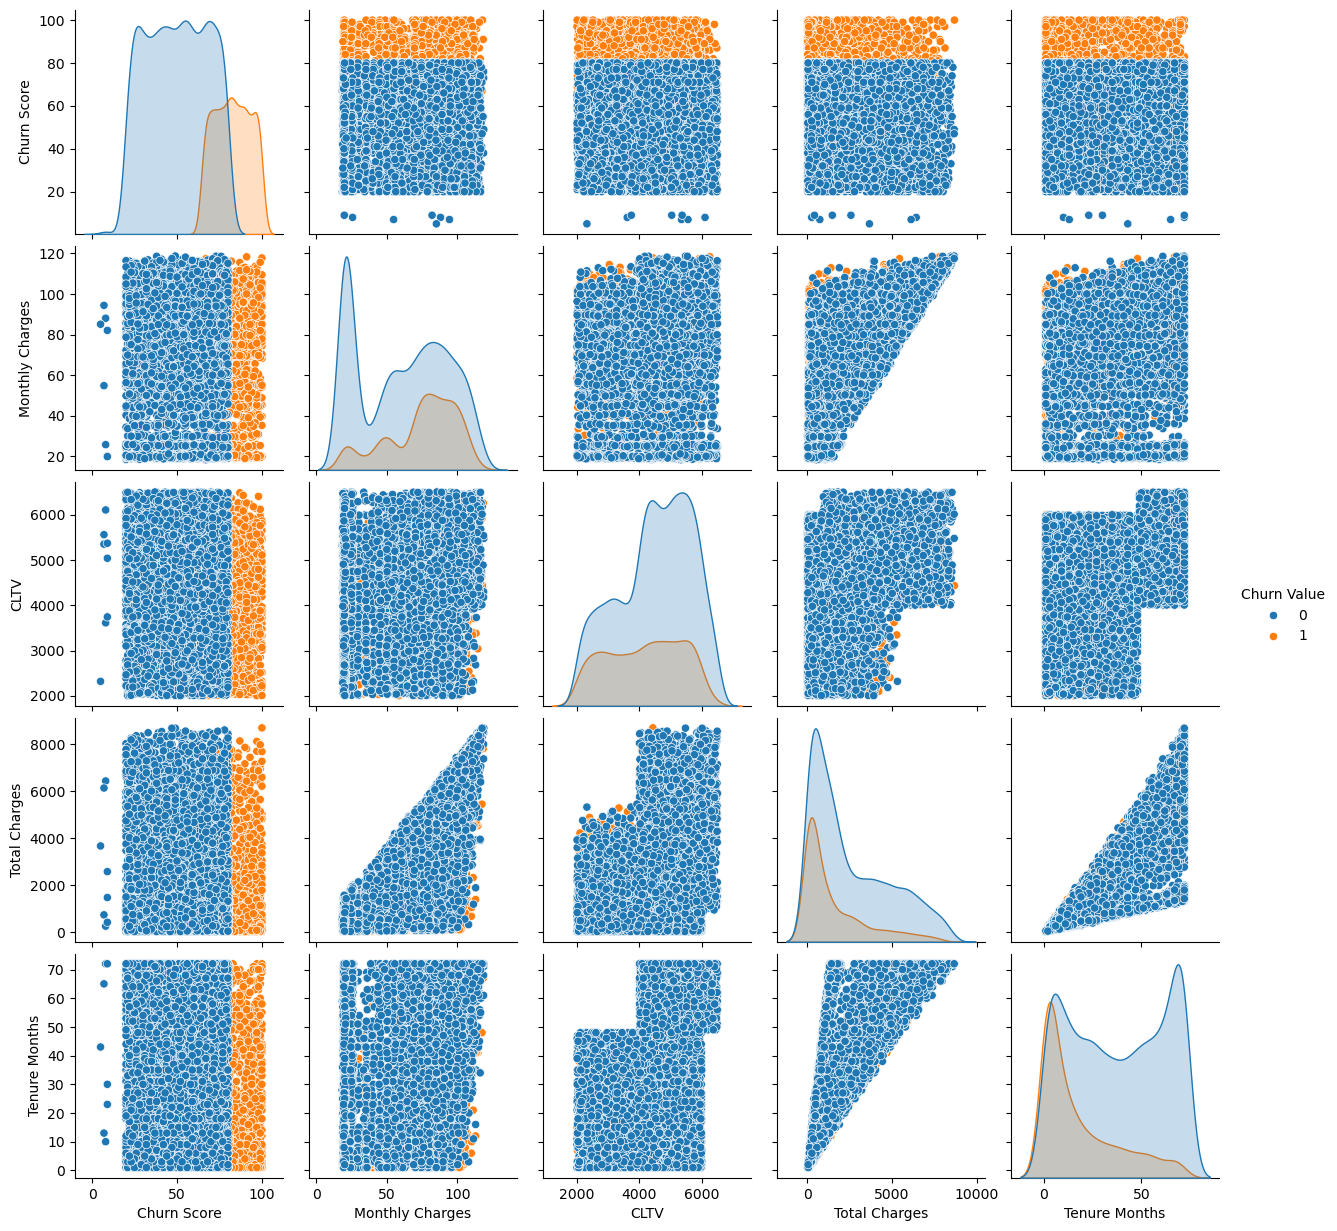

In [72]:
sns.pairplot(modelling_df[['Churn Value','Churn Score', 'Monthly Charges','CLTV','Total Charges','Tenure Months']],hue='Churn Value')
plt.show()

In [73]:
# Separate X and y

X_log_model = modelling_df.drop('Churn Value',axis=1)
y_log_model = modelling_df['Churn Value']

In [74]:
X_log_model.columns

Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score',
       'CLTV', 'Dependents_Yes', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Streaming Movies_No internet service',
       'Streaming Movies_Yes', 'Contract_One year', 'Contract_Two year',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

In [75]:
X_log_model.shape

(7032, 15)

In [76]:
# Train-test split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log_model, y_log_model, test_size=0.1, random_state=101)

In [77]:
# Scale data
scaler = StandardScaler()

scaled_X_train_log = scaler.fit_transform(X_train_log)
scaled_X_test_log = scaler.transform(X_test_log)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_model = LogisticRegression()

In [79]:
# setup paremter grid

# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values 
C = np.logspace(0, 4, 10)

param_grid = {'C': C, 'penalty': penalty}
grid_model = GridSearchCV(log_model,param_grid=param_grid, verbose=1)
grid_model.fit(scaled_X_train_log,y_train_log)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solve

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [80]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

y_pred_log = grid_model.predict(scaled_X_test_log)

In [82]:
# Check for overfitting and underfitting

# Compare train and test scores

print('Training set score: {:.4f}'.format(grid_model.score(scaled_X_train_log, y_train_log)))

print('Test set score: {:.4f}'.format(grid_model.score(scaled_X_test_log, y_test_log)))

Training set score: 0.9177
Test set score: 0.9205


These scores are very close, which is a good sign that the model is generalizing well to the test data and is not overfitting.
There is a
A small difference between the training and test accury scores. This shouldly indicaes a balanced model that performs consistently across both the training and test set Also s thatheur model has learned relevant patterns without capturing noise, resulting in good generalization to new data.

In [84]:
cm = confusion_matrix(y_test_log, y_pred_log)
print(cm)

[[474  28]
 [ 28 174]]


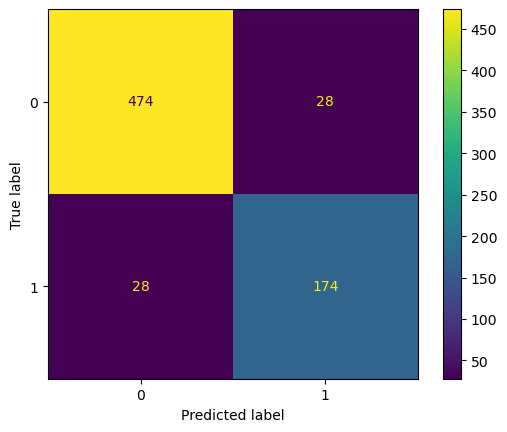

In [85]:
# Plotting a confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=grid_model.classes_)
disp.plot()
plt.show()

In [86]:
# Classification Report
print(classification_report(y_test_log,y_pred_log))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       502
           1       0.86      0.86      0.86       202

    accuracy                           0.92       704
   macro avg       0.90      0.90      0.90       704
weighted avg       0.92      0.92      0.92       704



<function matplotlib.pyplot.show(close=None, block=None)>

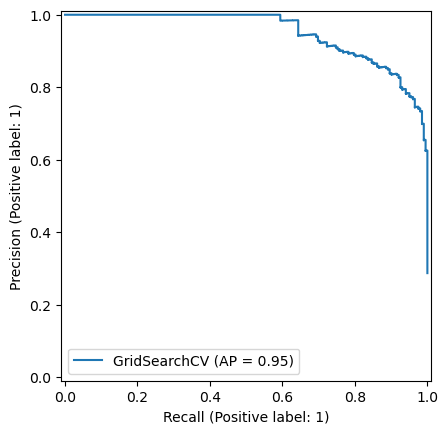

In [87]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(estimator=grid_model, X= scaled_X_test_log, y=y_test_log)
plt.show

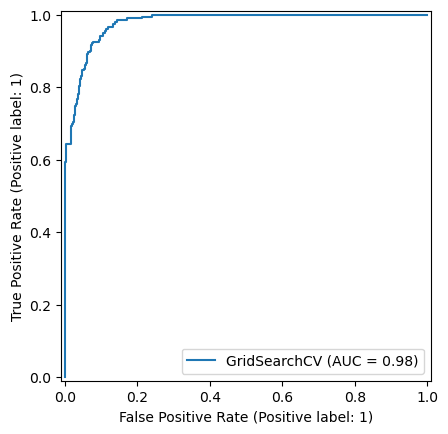

In [88]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(estimator=grid_model, X=scaled_X_test_log, y=y_test_log)
plt.show()

## 1.2. Building Logistic Model (Without Churn Score & CLTV)

In [90]:
# Separate X and y

X_log_model = modelling_df.drop(['Churn Value', 'Churn Score', 'CLTV'],axis=1)
y_log_model = modelling_df['Churn Value']

In [91]:
X_log_model.columns

Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Dependents_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Contract_One year', 'Contract_Two year',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

In [92]:
X_log_model.shape

(7032, 13)

In [93]:
# Train-test split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log_model, y_log_model, test_size=0.1, random_state=101)

In [94]:
# Scale data
scaler_n2 = StandardScaler()

scaled_X_train_log = scaler_n2.fit_transform(X_train_log)
scaled_X_test_log = scaler_n2.transform(X_test_log)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_model_n2 = LogisticRegression()

In [96]:
# setup paremter grid

# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values 
C = np.logspace(0, 4, 10)

param_grid = {'C': C, 'penalty': penalty}
grid_model_n2 = GridSearchCV(log_model_n2,param_grid=param_grid, verbose=1)
grid_model_n2.fit(scaled_X_train_log,y_train_log)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solve

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [97]:
grid_model_n2.best_params_

{'C': 2.7825594022071245, 'penalty': 'l2'}

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

y_pred_log = grid_model_n2.predict(scaled_X_test_log)

In [99]:
# Check for overfitting and underfitting

# Compare train and test scores

print('Training set score: {:.4f}'.format(grid_model_n2.score(scaled_X_train_log, y_train_log)))

print('Test set score: {:.4f}'.format(grid_model_n2.score(scaled_X_test_log, y_test_log)))

Training set score: 0.8070
Test set score: 0.8082


In [100]:
cm = confusion_matrix(y_test_log, y_pred_log)
print(cm)

[[445  57]
 [ 78 124]]


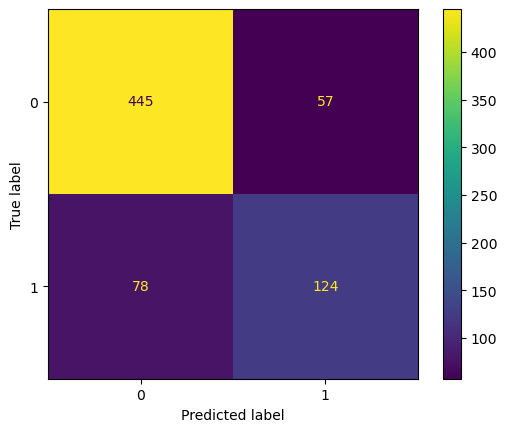

In [101]:
# Plotting a confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=grid_model_n2.classes_)
disp.plot()
plt.show()

In [102]:
# Classification Report
print(classification_report(y_test_log,y_pred_log))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       502
           1       0.69      0.61      0.65       202

    accuracy                           0.81       704
   macro avg       0.77      0.75      0.76       704
weighted avg       0.80      0.81      0.80       704



<function matplotlib.pyplot.show(close=None, block=None)>

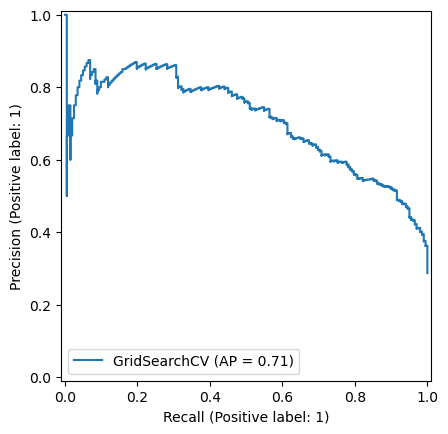

In [103]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(estimator=grid_model_n2, X= scaled_X_test_log, y=y_test_log)
plt.show

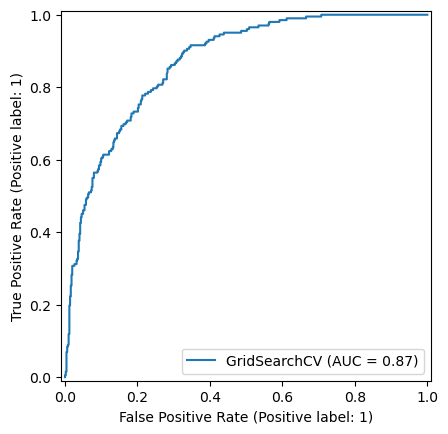

In [104]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(estimator=grid_model_n2, X=scaled_X_test_log, y=y_test_log)
plt.show()

# 2. KNN Model

## 2.1. KNN Model (With Churn Score)

In [107]:
# Separate X and y
X_knn_model = modelling_df.drop('Churn Value',axis=1)
y_knn_model = modelling_df['Churn Value']

In [108]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_knn_model, y_knn_model, test_size=0.1, random_state=101)

In [109]:
# Scale data
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [111]:
# evaluate k=1 model

y_pred = knn_model.predict(scaled_X_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

accuracy_score(y_test,y_pred)

0.8877840909090909

In [112]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[458,  44],
       [ 35, 167]])

In [113]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       502
           1       0.79      0.83      0.81       202

    accuracy                           0.89       704
   macro avg       0.86      0.87      0.86       704
weighted avg       0.89      0.89      0.89       704



In [114]:
# lets use elblow method to visualize optimal values for k

test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

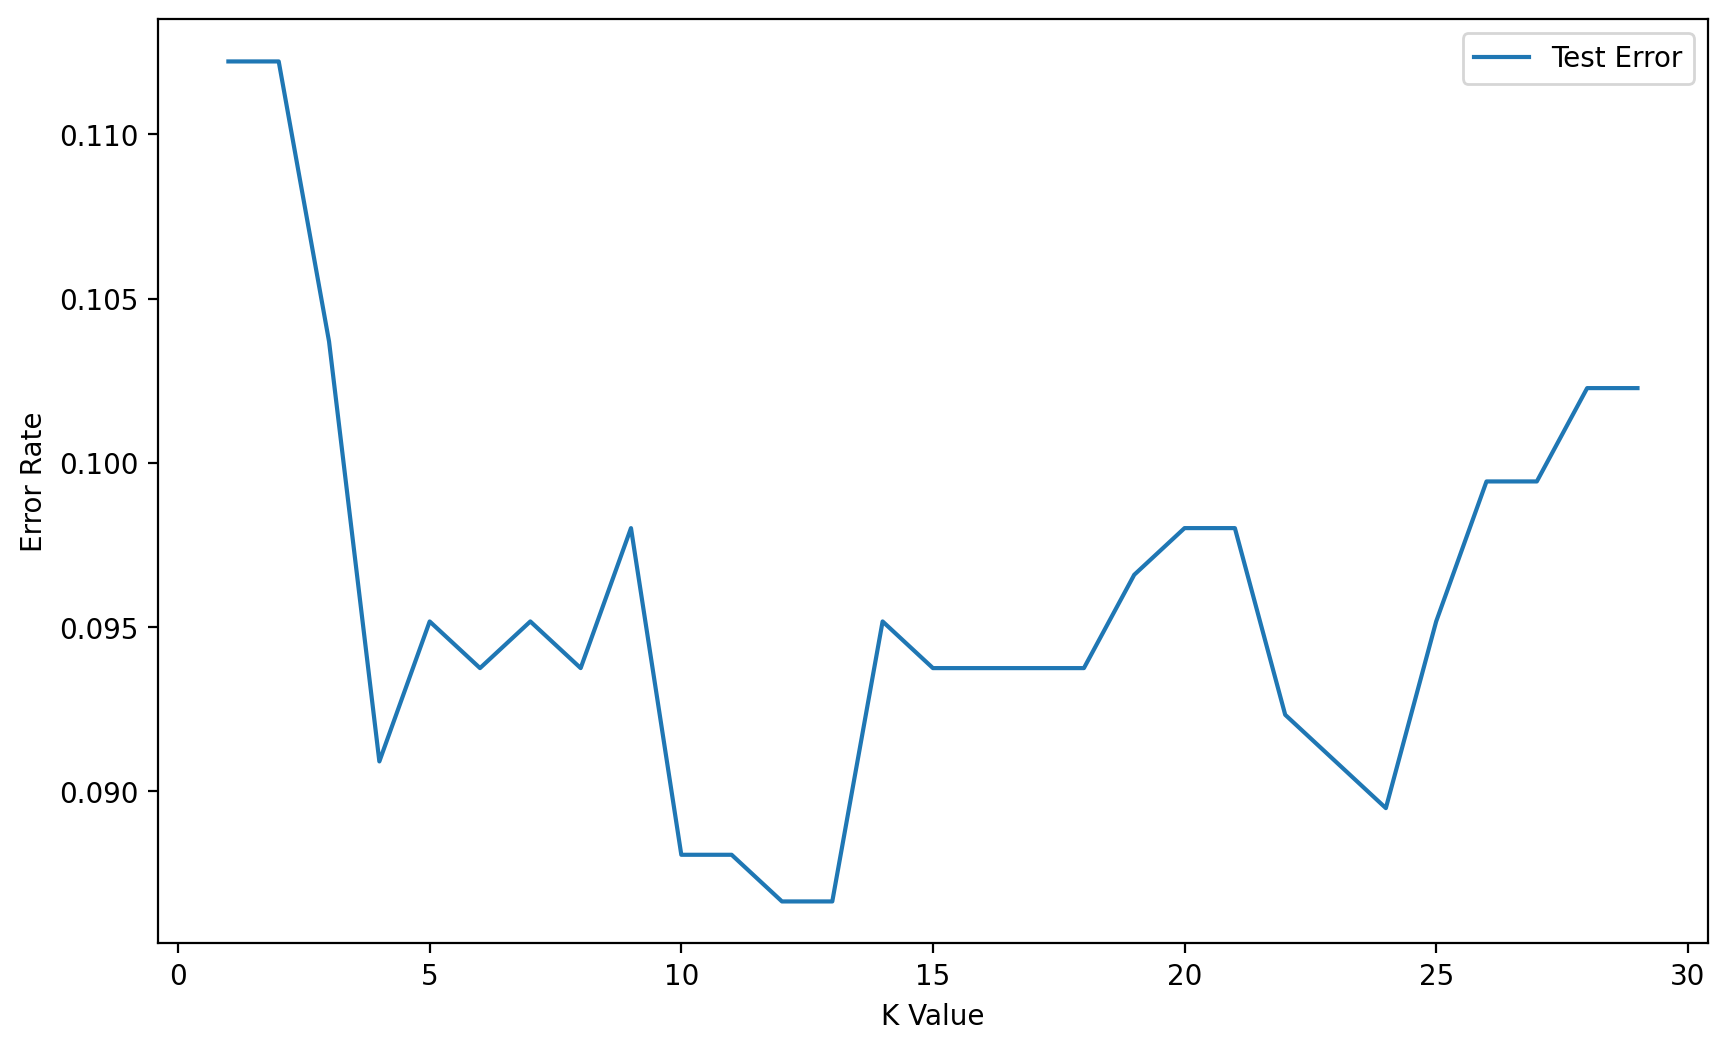

In [115]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [116]:
# Set-up pipeline object
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', KNeighborsClassifier())
])

In [117]:
# Set-up parameter grid
# Use GridSearchCV to find optimal params
from sklearn.model_selection import GridSearchCV

param_grid = {'classifier__n_neighbors': list(range(3,16,2)),
              'classifier__weights': ['uniform', 'distance'],
              'classifier__p': np.linspace(1,2,5)}

full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'classifier__p': array([1.  , 1.25, 1.5 , 1.75, 2.  ]),
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [118]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier',
   KNeighborsClassifier(n_neighbors=9, p=2.0, weights='distance'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': KNeighborsClassifier(n_neighbors=9, p=2.0, weights='distance'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__algorithm': 'auto',
 'classifier__leaf_size': 30,
 'classifier__metric': 'minkowski',
 'classifier__metric_params': None,
 'classifier__n_jobs': None,
 'classifier__n_neighbors': 9,
 'classifier__p': 2.0,
 'classifier__weights': 'distance'}

In [119]:
# Evaluate GridSearchCV Model
full_cv_classifier.cv_results_['mean_test_score'].mean()

0.8995291634665218

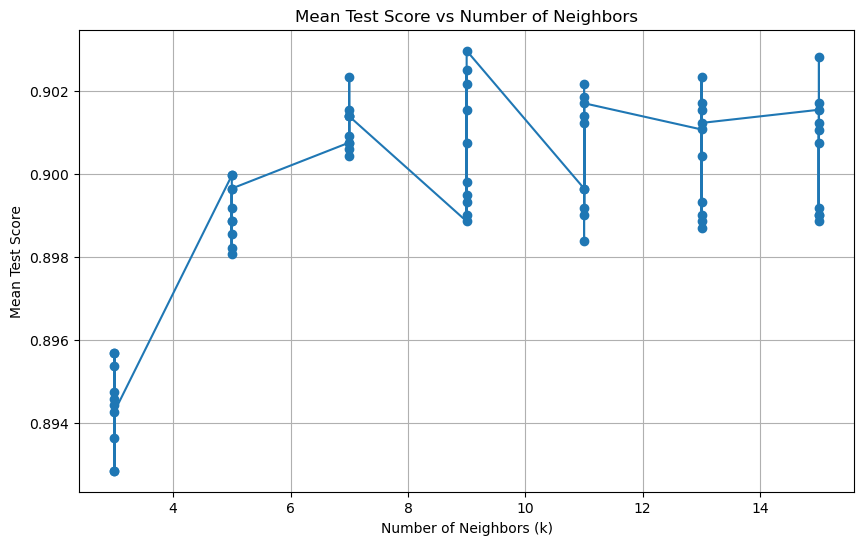

In [120]:
# Extract the mean test scores for each parameter set
mean_test_scores = full_cv_classifier.cv_results_['mean_test_score']
n_neighbors = full_cv_classifier.cv_results_['param_classifier__n_neighbors'].data

# Plot the mean test score for each k value
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs Number of Neighbors')
plt.grid(True)
plt.show()

In [121]:
best_knn_model = full_cv_classifier.best_estimator_
best_knn_model.fit(X_train, y_train)
y_pred_knn = best_knn_model.predict(X_test)

#### What is the probability of our prediction

In [123]:
# probability of Churn

best_knn_model.predict_proba(X_test)[:,1]

#accuracy
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_knn)))

Model accuracy score: 0.9020


In [124]:
# Check for overfitting and underfitting

# Compare train and test scores

print('Training set score: {:.4f}'.format(best_knn_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(best_knn_model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9020


These metrics suggest that our model may be overfitting.

In [126]:
# Null Accuracy

y_test.value_counts()

# Calculate null accuracy score

null_accuracy = (502/(502+202))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7131


Since our model's accuracy score is 0.9020, we can conclude that our model is doing well at predicting the different classes.

In [128]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_knn)

array([[463,  39],
       [ 30, 172]])

In [129]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       502
           1       0.82      0.85      0.83       202

    accuracy                           0.90       704
   macro avg       0.88      0.89      0.88       704
weighted avg       0.90      0.90      0.90       704



### k-fold Cross-Validation

In [131]:
# Applying 10-Fold cross-validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_knn_model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.8957346  0.8878357  0.90205371 0.92890995 0.9178515  0.88625592
 0.90363349 0.91311216 0.90981013 0.90348101]


In [132]:
# summary
print('Average cross-validation score: {:.4f}'.format(scores.mean()))
print('Lowest cross-validation score: {:.4f}'.format(scores.min()))
print('Highest cross-validation score: {:.4f}'.format(scores.max()))

Average cross-validation score: 0.9049
Lowest cross-validation score: 0.8863
Highest cross-validation score: 0.9289


10-fold cross-validation does not improve model extensively. However there is small variance in the accuracy between folds (ranging from 88.63% to 92.89%)

## Prediction
Both models perform on par in terms of accuracy (only 2% difference) butThe logistic regression model will be the one chosen to make a prediction since the KNN model seems to an overfitting one.

In [135]:
y_test_log.head(1)

4246    0
Name: Churn Value, dtype: int64

In [136]:
modelling_df.iloc[4246]

Tenure Months                                3.0
Monthly Charges                             29.8
Total Charges                               94.4
Churn Value                                  0.0
Churn Score                                 32.0
CLTV                                      5614.0
Dependents_Yes                               0.0
Internet Service_Fiber optic                 0.0
Internet Service_No                          0.0
Streaming Movies_No internet service         0.0
Streaming Movies_Yes                         0.0
Contract_One year                            0.0
Contract_Two year                            0.0
Payment Method_Credit card (automatic)       1.0
Payment Method_Electronic check              0.0
Payment Method_Mailed check                  0.0
Name: 4246, dtype: float64

In [137]:
X_log_model.iloc[4246]

Tenure Months                              3.0
Monthly Charges                           29.8
Total Charges                             94.4
Dependents_Yes                             0.0
Internet Service_Fiber optic               0.0
Internet Service_No                        0.0
Streaming Movies_No internet service       0.0
Streaming Movies_Yes                       0.0
Contract_One year                          0.0
Contract_Two year                          0.0
Payment Method_Credit card (automatic)     1.0
Payment Method_Electronic check            0.0
Payment Method_Mailed check                0.0
Name: 4246, dtype: float64

In [138]:
# Client info in array format
log_model_prediction_client = [[3.0, 29.8, 94.4, 32.0, 5614.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]

In [139]:
scaled_client = scaler.transform(log_model_prediction_client)
client_pred_log_model = grid_model.predict(scaled_client)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [140]:
prob_of_pred = grid_model.predict_proba(scaled_client)

In [141]:
if client_pred_log_model[0] == 1:
    print("The model predicts that the customer left the company this quarter.")
else:
    print("The model predicts that the customer remained with the company.")

print(f"Prediction probability: {prob_of_pred[0][1]:.2f} (for the customer leaving)")

The model predicts that the customer remained with the company.
Prediction probability: 0.00 (for the customer leaving)


In summary, the model predicted correctly, and the 0% probability (for the customer leaving) or 100% (for the customer staying) indicates that the model is highly confident in this outcome.
However, in the future more predictions should possibly be examined to see if these absolute probabilities are consitently observed across the board as this may indicate a high certainty model which could potentialy suggest overconfidence or an issue with model calibration.

## 2.2. KNN Model (without Churn Score & CLTV)

In [144]:
# Separate X and y
X_knn_model = modelling_df.drop(['Churn Value', 'Churn Score', 'CLTV'],axis=1)
y_knn_model = modelling_df['Churn Value']

In [145]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_knn_model, y_knn_model, test_size=0.1, random_state=101)

In [146]:
# Scale data
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [147]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [148]:
# evaluate k=1 model

y_pred = knn_model.predict(scaled_X_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

accuracy_score(y_test,y_pred)

0.7443181818181818

In [149]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[413,  89],
       [ 91, 111]])

In [150]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       502
           1       0.56      0.55      0.55       202

    accuracy                           0.74       704
   macro avg       0.69      0.69      0.69       704
weighted avg       0.74      0.74      0.74       704



In [151]:
# lets use elblow method to visualize optimal values for k

test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

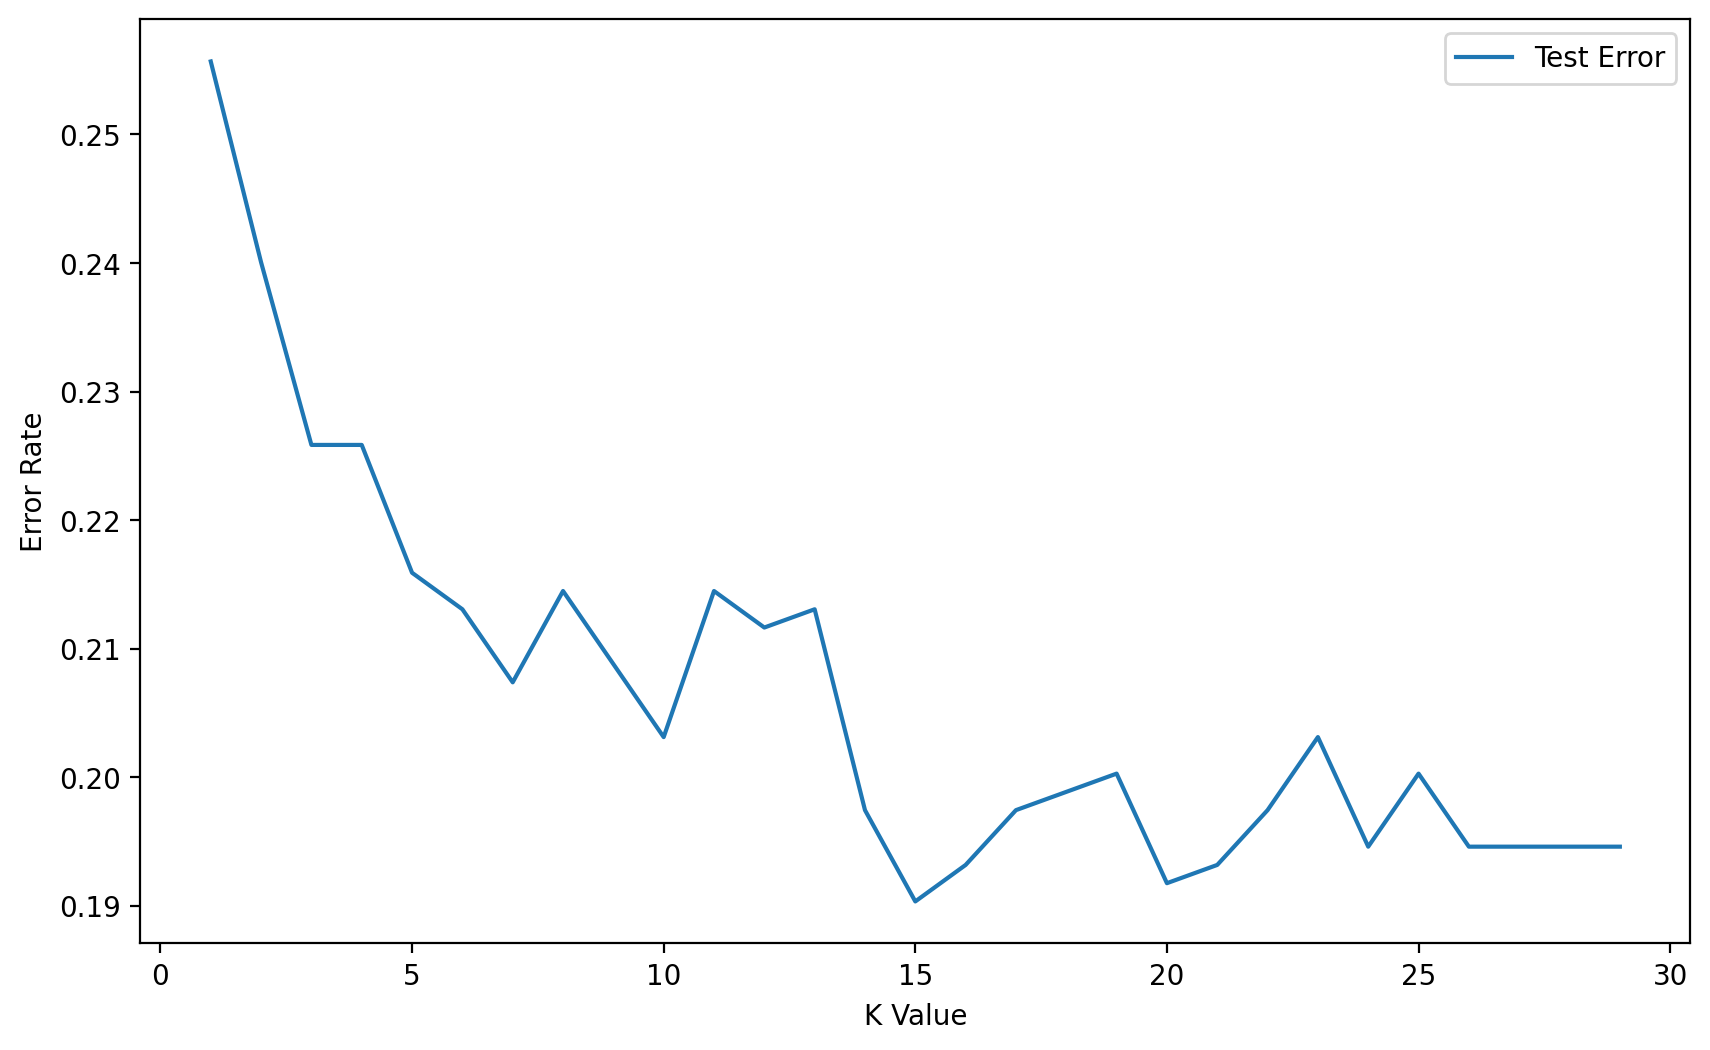

In [152]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [153]:
# Set-up pipeline object
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', KNeighborsClassifier())
])

In [154]:
# Set-up parameter grid
# Use GridSearchCV to find optimal params
from sklearn.model_selection import GridSearchCV

param_grid = {'classifier__n_neighbors': list(range(15,21,2)),
              'classifier__weights': ['uniform', 'distance'],
              'classifier__p': np.linspace(1,2,5)}

full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [15, 17, 19],
                         'classifier__p': array([1.  , 1.25, 1.5 , 1.75, 2.  ]),
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [155]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', KNeighborsClassifier(n_neighbors=19, p=1.5))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': KNeighborsClassifier(n_neighbors=19, p=1.5),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__algorithm': 'auto',
 'classifier__leaf_size': 30,
 'classifier__metric': 'minkowski',
 'classifier__metric_params': None,
 'classifier__n_jobs': None,
 'classifier__n_neighbors': 19,
 'classifier__p': 1.5,
 'classifier__weights': 'uniform'}

In [156]:
# Evaluate GridSearchCV Model
full_cv_classifier.cv_results_['mean_test_score'].mean()

0.7888119189005239

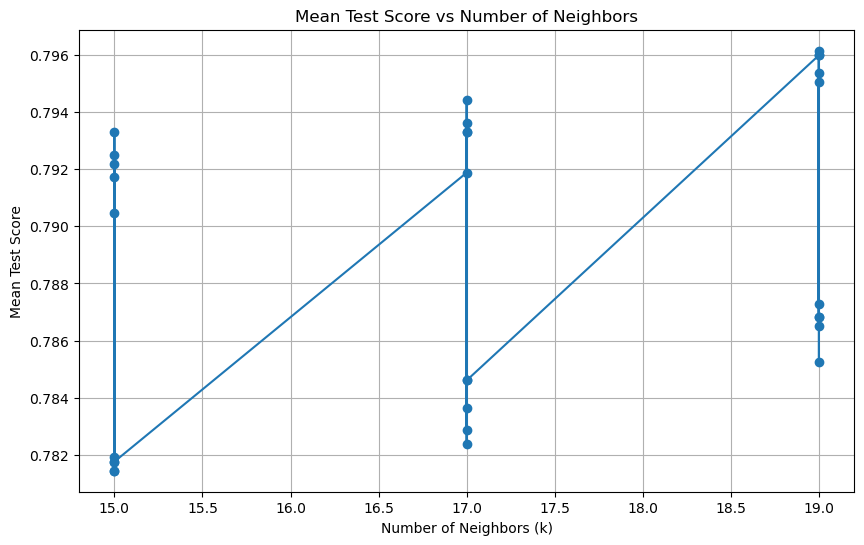

In [157]:
# Extract the mean test scores for each parameter set
mean_test_scores = full_cv_classifier.cv_results_['mean_test_score']
n_neighbors = full_cv_classifier.cv_results_['param_classifier__n_neighbors'].data

# Plot the mean test score for each k value
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs Number of Neighbors')
plt.grid(True)
plt.show()

In [158]:
best_knn_model = full_cv_classifier.best_estimator_
best_knn_model.fit(X_train, y_train)
y_pred_knn = best_knn_model.predict(X_test)

### What is the probability of our prediction

In [160]:
# probability of Churn

best_knn_model.predict_proba(X_test)[:,1]

#accuracy
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_knn)))

Model accuracy score: 0.7983


In [161]:
# Check for overfitting and underfitting

# Compare train and test scores

print('Training set score: {:.4f}'.format(best_knn_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(best_knn_model.score(X_test, y_test)))

Training set score: 0.8143
Test set score: 0.7983


In [162]:
# Null Accuracy

y_test.value_counts()

# Calculate null accuracy score

null_accuracy = (502/(502+202))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7131


In [163]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_knn)

array([[449,  53],
       [ 89, 113]])

In [164]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       502
           1       0.68      0.56      0.61       202

    accuracy                           0.80       704
   macro avg       0.76      0.73      0.74       704
weighted avg       0.79      0.80      0.79       704



### k-fold Cross-Validation

In [166]:
# Applying 10-Fold cross-validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_knn_model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80410742 0.78199052 0.81516588 0.80410742 0.79462875 0.7835703
 0.8056872  0.7835703  0.78639241 0.79272152]


In [167]:
# summary
print('Average cross-validation score: {:.4f}'.format(scores.mean()))
print('Lowest cross-validation score: {:.4f}'.format(scores.min()))
print('Highest cross-validation score: {:.4f}'.format(scores.max()))

Average cross-validation score: 0.7952
Lowest cross-validation score: 0.7820
Highest cross-validation score: 0.8152


## Prediction (without Churn Score & CLTV)
Both models perform on par in terms of accuracy (only 1% difference). The logistic regression model will be used again for prediction asper our last attempt

In [169]:
y_test_log.head(1)

4246    0
Name: Churn Value, dtype: int64

In [170]:
df_naudeen.iloc[4246]

Senior Citizen                            No
Partner                                  Yes
Dependents                                No
Tenure Months                              3
Phone Service                             No
Multiple Lines              No phone service
Internet Service                         DSL
Online Security                           No
Online Backup                            Yes
Device Protection                         No
Tech Support                              No
Streaming TV                              No
Streaming Movies                          No
Contract                      Month-to-month
Paperless Billing                         No
Payment Method       Credit card (automatic)
Monthly Charges                         29.8
Total Charges                           94.4
Churn Value                                0
Churn Score                               32
CLTV                                    5614
Name: 4251, dtype: object

In [171]:
X_log_model.iloc[4246]

Tenure Months                              3.0
Monthly Charges                           29.8
Total Charges                             94.4
Dependents_Yes                             0.0
Internet Service_Fiber optic               0.0
Internet Service_No                        0.0
Streaming Movies_No internet service       0.0
Streaming Movies_Yes                       0.0
Contract_One year                          0.0
Contract_Two year                          0.0
Payment Method_Credit card (automatic)     1.0
Payment Method_Electronic check            0.0
Payment Method_Mailed check                0.0
Name: 4246, dtype: float64

In [172]:
# Client info in array format
log_model_prediction_client = [[3.0, 29.8, 94.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]

In [173]:
scaled_client = scaler_n2.transform(log_model_prediction_client)
client_pred_log_model = grid_model_n2.predict(scaled_client)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [174]:
prob_of_pred = grid_model_n2.predict_proba(scaled_client)

In [175]:
if client_pred_log_model[0] == 1:
    print("The model predicts that the customer left the company this quarter.")
else:
    print("The model predicts that the customer remained with the company.")

print(f"Prediction probability: {prob_of_pred[0][1]:.2f} (for the customer leaving)")

The model predicts that the customer remained with the company.
Prediction probability: 0.47 (for the customer leaving)


The model predicts that the customer remained with the company.
Prediction probability: 0.47 (for the customer leaving)
In summary, the model predicted correctly, 47% probability (for the customer leaving) or 53% (for the customer staying).

A probability close to 0.5 indicates that the model is less confident about its prediction, as the probabilities for each class are quite close. In this case, with 0.47 (for the customer leaving), the model’s confidence is relatively low.

In summary, while the model predicts that the client will stay, the confidence is not strong. This might suggest that the decision is borderli.y.

# 3. Decision Tree Model 

## 3.1. Decision Tree Model (With Churn Score)

##### Read data in a dataframe.

In [180]:
df_kun=pd.read_excel("churn.xlsx").drop(["Churn Label","Longitude","Latitude","City","Country","CustomerID","Count","State","Zip Code","Lat Long","Churn Reason"],axis=1)
df_kun["Total Charges"]=pd.to_numeric(df_kun["Total Charges"],errors="coerce")
df_kun=df_kun.dropna()
df_kun.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV'],
      dtype='object')

#### Visualizations with different numeric features

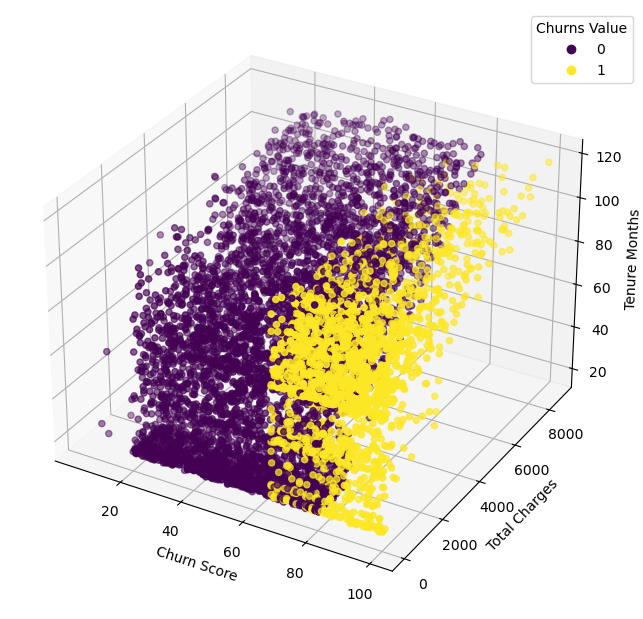

In [182]:
numeric_col=[
    #'Tenure Months',
    'Monthly Charges',
    'Total Charges',
    'Churn Score',
    #'CLTV'
    "Churn Value"
]
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
data=df_kun[numeric_col]
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
fig.add_axes(ax)
sc = ax.scatter( data["Churn Score"], data["Total Charges"],data["Monthly Charges"],
                c=data['Churn Value'])
ax.set_xlabel('Churn Score')
ax.set_ylabel('Total Charges')
ax.set_zlabel('Tenure Months')

# add a legend
plt.legend(*sc.legend_elements(), title='Churns Value',
           bbox_to_anchor=(1.05, 1));


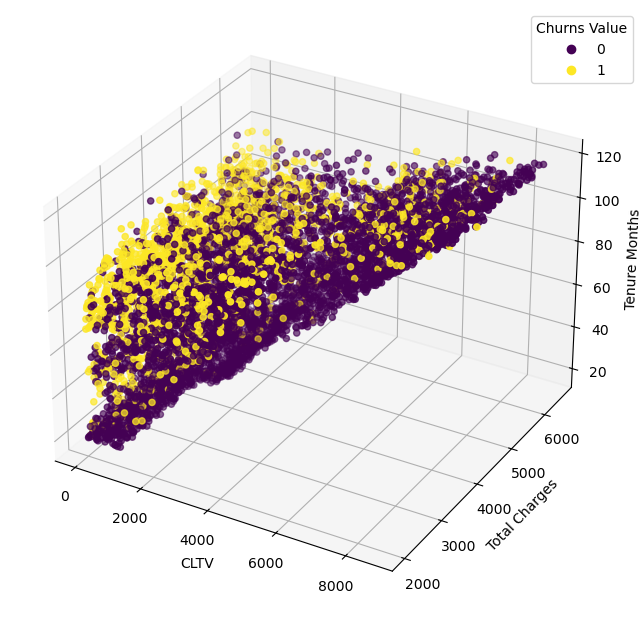

In [183]:
numeric_col=[
    #'Tenure Months',
    'Monthly Charges',
    'Total Charges',
    #'Churn Score',
    'CLTV',
    "Churn Value"
]
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
data=df_kun[numeric_col]
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
fig.add_axes(ax)
sc = ax.scatter( data["Total Charges"],data["CLTV"],data["Monthly Charges"],
                c=data['Churn Value'])
ax.set_xlabel('CLTV')
ax.set_ylabel('Total Charges')
ax.set_zlabel('Tenure Months')

# add a legend
plt.legend(*sc.legend_elements(), title='Churns Value',
           bbox_to_anchor=(1.05, 1));


#### Apply ordinalencoder trasnformation on al the related columns

In [185]:
# apply ordinalencoder transformation
from sklearn.preprocessing import OrdinalEncoder
encoder4=OrdinalEncoder()
df_encoder=df_kun.copy()
a_encoder1=encoder4.fit_transform(df_encoder)
df_encoder1=pd.DataFrame(a_encoder1,columns=df_encoder.columns)
df_corr=df_encoder1.corr()
print(df_corr["Churn Value"].sort_values(ascending=False))
print(np.abs(df_corr["Churn Value"]).sort_values(ascending=False))

Churn Value          1.000000
Churn Score          0.665408
Paperless Billing    0.191454
Monthly Charges      0.182989
Senior Citizen       0.150541
Payment Method       0.107852
Multiple Lines       0.038043
Phone Service        0.011691
Gender              -0.008545
Streaming TV        -0.036303
Streaming Movies    -0.038802
Internet Service    -0.047097
CLTV                -0.126813
Partner             -0.149982
Device Protection   -0.177883
Online Backup       -0.195290
Total Charges       -0.230843
Dependents          -0.248140
Tech Support        -0.282232
Online Security     -0.289050
Tenure Months       -0.354049
Contract            -0.396150
Name: Churn Value, dtype: float64
Churn Value          1.000000
Churn Score          0.665408
Contract             0.396150
Tenure Months        0.354049
Online Security      0.289050
Tech Support         0.282232
Dependents           0.248140
Total Charges        0.230843
Online Backup        0.195290
Paperless Billing    0.191454
Monthl

#### Bar charts for the correlations between target variable and all features

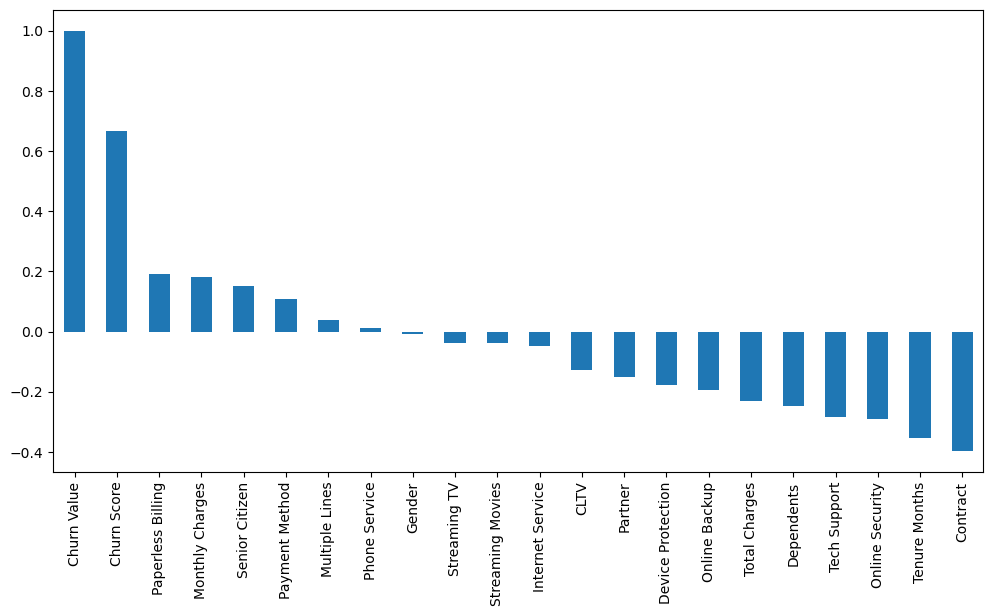

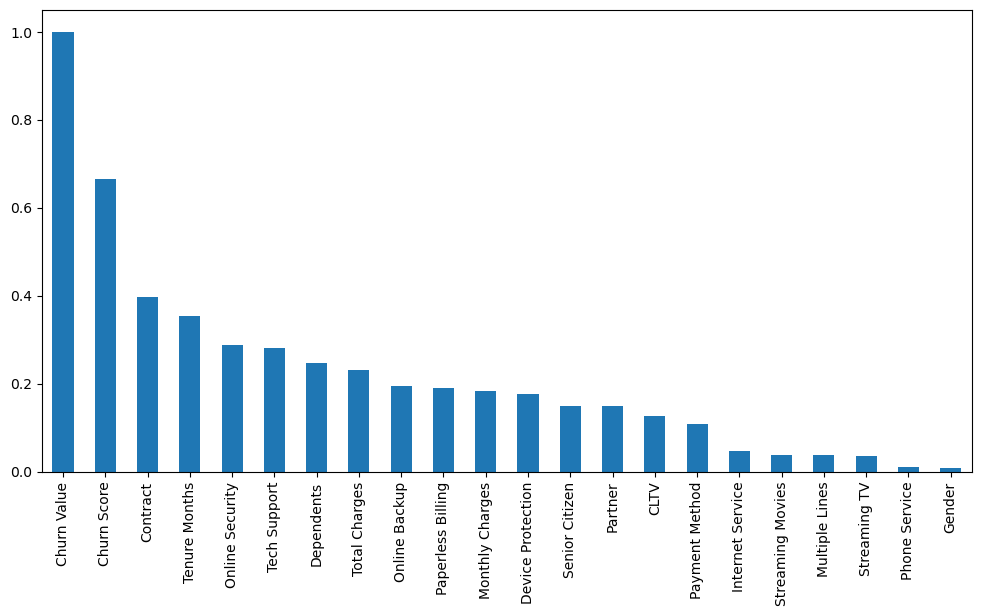

In [187]:
# check again without direction
correlations=df_corr["Churn Value"].sort_values(ascending=False).plot.bar(figsize=(12,6))
df_abs=np.abs(df_corr["Churn Value"])
top10=df_abs.sort_values(ascending=False).index.tolist()[:10]
plt.figure()
np.abs(df_corr["Churn Value"]).sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.show()

#### Fatures selectionss

In [189]:
top10

['Churn Value',
 'Churn Score',
 'Contract',
 'Tenure Months',
 'Online Security',
 'Tech Support',
 'Dependents',
 'Total Charges',
 'Online Backup',
 'Paperless Billing']

#### Building a Gini Decision Tree model with top features.

In [191]:
top_features=[
 #'Churn Value',
 'Churn Score',
 'Contract',
 'Tenure Months',
 'Online Security',
 #'Tech Support',
 #'Dependents',
# 'Total Charges',
 #'Online Backup',
 #'Paperless Billing'
]
X4=df_kun[top_features]
y4=df_kun["Churn Value"]

In [192]:
from sklearn.model_selection import train_test_split
X_train4,X_test4,y_train4,y_test4=train_test_split(X4,y4,test_size=0.2,random_state=42)
from sklearn.preprocessing import OrdinalEncoder
encoder5=OrdinalEncoder()
X_train4_encoder=encoder5.fit_transform(X_train4)
X_test4_encoder=encoder5.transform(X_test4)
from sklearn.preprocessing import StandardScaler
std4=StandardScaler()
X_train4_std=std4.fit_transform(X_train4_encoder)
X_test4_std=std4.transform(X_test4_encoder)


In [193]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion="gini",max_depth=5,random_state=42)
clf_gini.fit(X_train4_std,y_train4)


DecisionTreeClassifier(max_depth=5, random_state=42)

The confusion matrix is 
 [[940  72]
 [ 52 343]]
The classification report is 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1012
           1       0.83      0.87      0.85       395

    accuracy                           0.91      1407
   macro avg       0.89      0.90      0.89      1407
weighted avg       0.91      0.91      0.91      1407

Training set score: 0.9202
Test set score: 0.9119


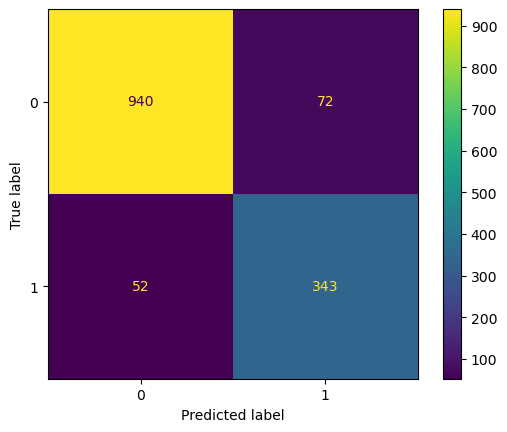

In [194]:
y_test_pred4=clf_gini.predict(X_test4_std)
y_train_pred4=clf_gini.predict(X_train4_std)
from sklearn.metrics import confusion_matrix as cm, ConfusionMatrixDisplay as cmd,classification_report as cr 
print(f"The confusion matrix is \n {cm(y_test4,y_test_pred4)}")
print(f"The classification report is \n {cr(y_test4,y_test_pred4)}")
print('Training set score: {:.4f}'.format(clf_gini.score(X_train4_std, y_train4)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test4_std, y_test4)))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm(y_test4,y_test_pred4), display_labels=clf_gini.classes_)
disp.plot()
plt.show()

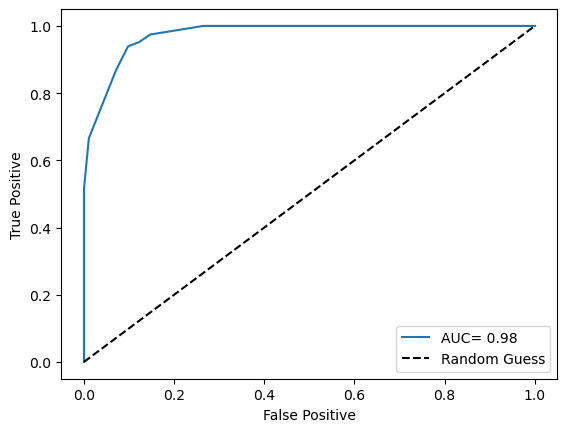

In [195]:
from sklearn.metrics import auc,roc_curve
probs4=clf_gini.predict_proba(X_test4_std)[:,1]
fpr,tpr,threshold=roc_curve(y_test4,probs4)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC= %0.2f" % roc_auc)
plt.plot([0,1],[0,1],"k--",label="Random Guess")
plt.legend(loc="lower right")
plt.ylabel("True Positive")
plt.xlabel("False Positive")
plt.show()

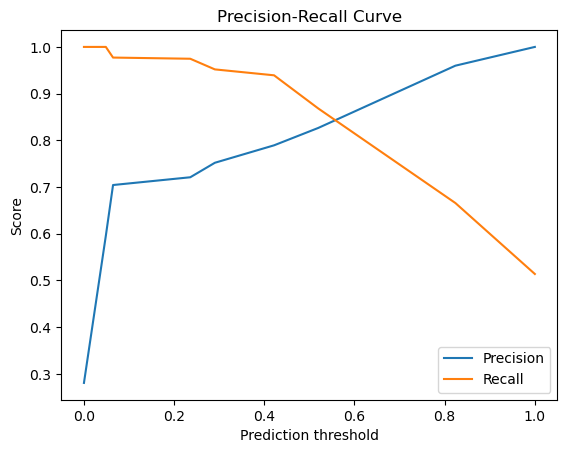

In [196]:
from sklearn.metrics import precision_recall_curve
probs4=clf_gini.predict_proba(X_test4_std)[:,1]
p_curve,r_curve,t_curve=precision_recall_curve(y_test4,probs4)
plt.figure()
plt.plot(t_curve,p_curve[:-1],label="Precision")
plt.plot(t_curve,r_curve[:-1],label="Recall")
plt.title("Precision-Recall Curve")
plt.xlabel("Prediction threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

#### No overfitting, High precision and high recall and high accuracy score. Great model

#### Build a Entropy Decision Tree with top feature

In [199]:
df_kun=pd.read_excel("churn.xlsx").drop(["Churn Label","Longitude","Latitude","City","Country","CustomerID","Count","State","Zip Code","Lat Long","Churn Reason"],axis=1)
df_kun["Total Charges"]=pd.to_numeric(df_kun["Total Charges"],errors="coerce")
df_kun=df_kun.dropna()
df_kun.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV'],
      dtype='object')

In [200]:
top_features=[
 #'Churn Value',
 'Churn Score',
 'Contract',
 'Tenure Months',
 'Online Security',
 #'Tech Support',
 #'Dependents',
# 'Total Charges',
 #'Online Backup',
 #'Paperless Billing'
]
X5=df_kun[top_features]
y5=df_kun["Churn Value"]

In [201]:
from sklearn.model_selection import train_test_split
X_train5,X_test5,y_train5,y_test5=train_test_split(X5,y5,test_size=0.2,random_state=42)
from sklearn.preprocessing import OrdinalEncoder
encoder6=OrdinalEncoder()
X_train5_encoder=encoder6.fit_transform(X_train5)
X_test5_encoder=encoder6.transform(X_test5)
from sklearn.preprocessing import StandardScaler
std5=StandardScaler()
X_train5_std=std5.fit_transform(X_train4_encoder)
X_test5_std=std5.transform(X_test4_encoder)


In [202]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train5_std, y_train5)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

The confusion matrix is 
 [[888 124]
 [ 15 380]]
The classification report is 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93      1012
           1       0.75      0.96      0.85       395

    accuracy                           0.90      1407
   macro avg       0.87      0.92      0.89      1407
weighted avg       0.92      0.90      0.90      1407

Training set score: 0.9033
Test set score: 0.9012


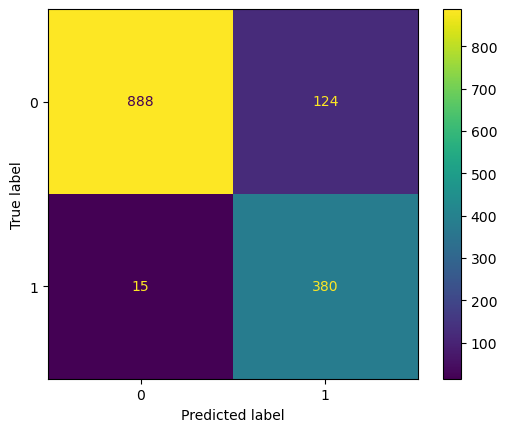

In [203]:
y_test_pred5=clf_en.predict(X_test5_std)
y_train_pred5=clf_en.predict(X_train5_std)
from sklearn.metrics import confusion_matrix as cm, ConfusionMatrixDisplay as cmd,classification_report as cr 
print(f"The confusion matrix is \n {cm(y_test5,y_test_pred5)}")
print(f"The classification report is \n {cr(y_test5,y_test_pred5)}")
print('Training set score: {:.4f}'.format(clf_en.score(X_train5_std, y_train5)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test5_std, y_test5)))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm(y_test5,y_test_pred5), display_labels=clf_en.classes_)
disp.plot()
plt.show()

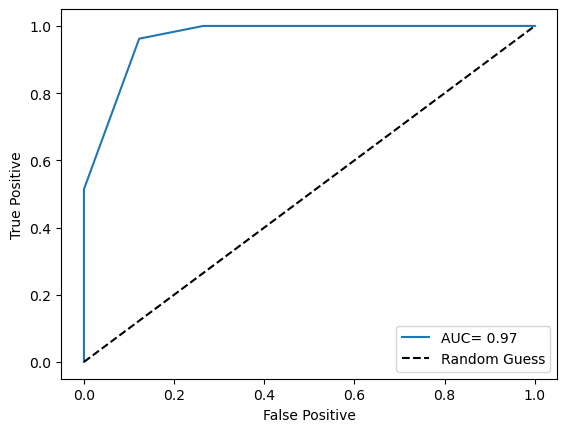

In [204]:
from sklearn.metrics import auc,roc_curve
probs5=clf_en.predict_proba(X_test5_std)[:,1]
fpr,tpr,threshold=roc_curve(y_test5,probs5)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC= %0.2f" % roc_auc)
plt.plot([0,1],[0,1],"k--",label="Random Guess")
plt.legend(loc="lower right")
plt.ylabel("True Positive")
plt.xlabel("False Positive")
plt.show()

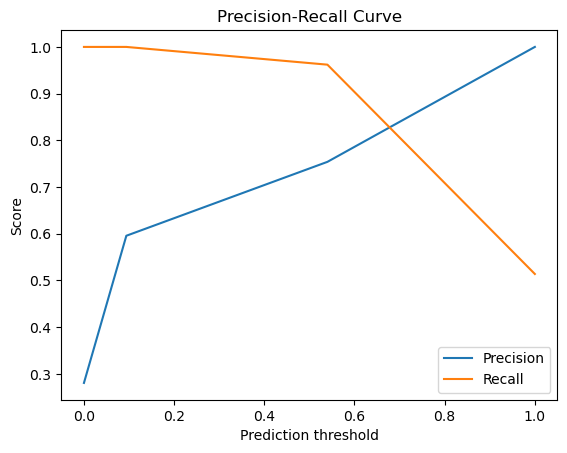

In [205]:
from sklearn.metrics import precision_recall_curve
probs5=clf_en.predict_proba(X_test5_std)[:,1]
p_curve,r_curve,t_curve=precision_recall_curve(y_test5,probs5)
plt.figure()
plt.plot(t_curve,p_curve[:-1],label="Precision")
plt.plot(t_curve,r_curve[:-1],label="Recall")
plt.title("Precision-Recall Curve")
plt.xlabel("Prediction threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

### High accuracy scores, medium precision, quite high recall, no overfitting. Recommanding this model for recalls, but not if the goal is to improve precision.

## Prediction with Gini

In [208]:
test4=pd.concat([X_test4,y_test4],axis=1)
prediction_data=test4.sample(1)
print(prediction_data)
X=prediction_data[['Churn Score','Contract','Tenure Months','Online Security',]]
y=prediction_data["Churn Value"]
X_encode=encoder5.transform(X)
X_std=std4.transform(X_encode)
clf_gini.predict(X_std)

     Churn Score        Contract  Tenure Months Online Security  Churn Value
842           73  Month-to-month             12              No            1


array([1])

## Prediction with Entrope

In [210]:
test5=pd.concat([X_test5,y_test5],axis=1)
prediction_data=test5.sample(1)
print(prediction_data)
X=prediction_data[['Churn Score','Contract','Tenure Months','Online Security',]]
y=prediction_data["Churn Value"]
X_encode=encoder6.transform(X)
X_std=std5.transform(X_encode)
clf_en.predict(X_std)

    Churn Score        Contract  Tenure Months Online Security  Churn Value
31           80  Month-to-month              1              No            1


array([1])

## 3.2. Decision Tree Model (Without Churn Score)

In [212]:
df_kun=pd.read_excel("churn.xlsx").drop(["CLTV","Churn Score","Churn Label","Longitude","Latitude","City","Country","CustomerID","Count","State","Zip Code","Lat Long","Churn Reason"],axis=1)
df_kun["Total Charges"]=pd.to_numeric(df_kun["Total Charges"],errors="coerce")
df_kun=df_kun.dropna()
df_kun.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value'],
      dtype='object')

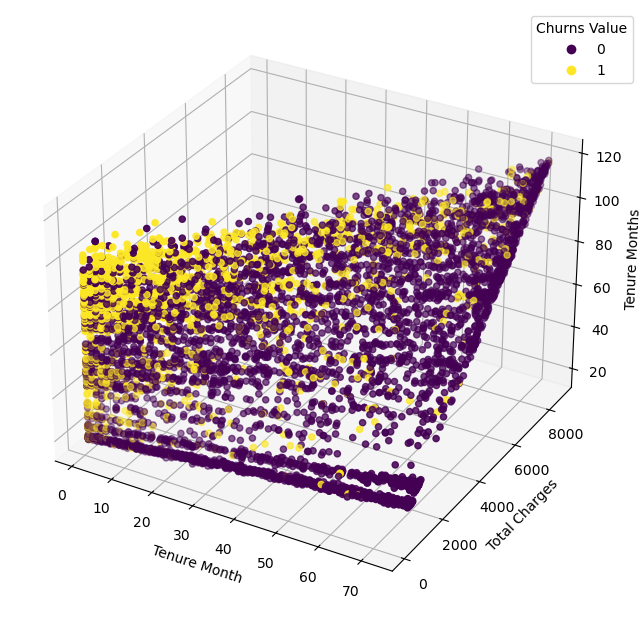

In [213]:
numeric_col=[
    'Tenure Months',
    'Monthly Charges',
    'Total Charges',
    #'Churn Score',
    #'CLTV'
    "Churn Value"
]
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
data=df_kun[numeric_col]
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
fig.add_axes(ax)
sc = ax.scatter( data["Tenure Months"], data["Total Charges"],data["Monthly Charges"],
                c=data['Churn Value'])
ax.set_xlabel('Tenure Month')
ax.set_ylabel('Total Charges')
ax.set_zlabel('Tenure Months')

# add a legend
plt.legend(*sc.legend_elements(), title='Churns Value',
           bbox_to_anchor=(1.05, 1));


### Feature Selection

In [215]:
df_new=pd.get_dummies(df_kun,drop_first=True)
df_new.columns

Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Gender_Male', 'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Phone Service_Yes', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No internet service',
       'Streaming Movies_Yes', 'Contract_One year', 'Contract_Two year',
       'Paperless Billing_Yes', 'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

#### Correlation analysis on original variables and dummies variables

Churn Value                              1.000000
Tenure Months                            0.354049
Internet Service_Fiber optic             0.307463
Contract_Two year                        0.301552
Payment Method_Electronic check          0.301455
Dependents_Yes                           0.248140
Internet Service_No                      0.227578
Streaming Movies_No internet service     0.227578
Streaming TV_No internet service         0.227578
Tech Support_No internet service         0.227578
Device Protection_No internet service    0.227578
Online Security_No internet service      0.227578
Online Backup_No internet service        0.227578
Total Charges                            0.199484
Monthly Charges                          0.192858
Paperless Billing_Yes                    0.191454
Contract_One year                        0.178225
Online Security_Yes                      0.171270
Tech Support_Yes                         0.164716
Senior Citizen_Yes                       0.150541


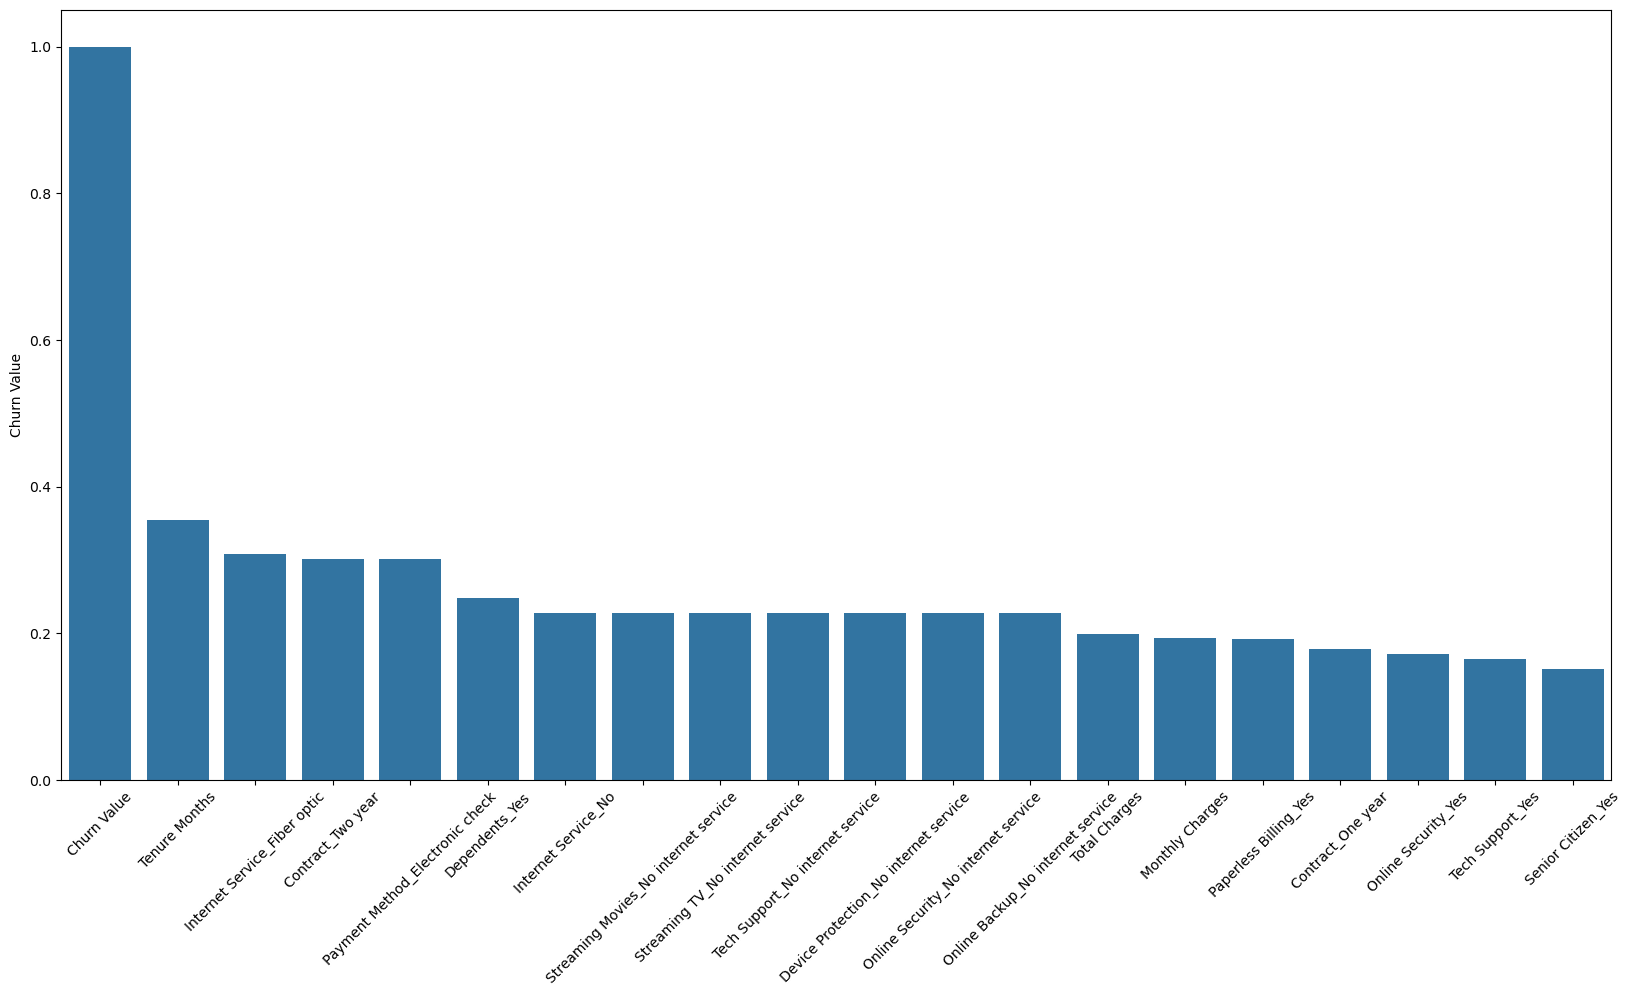

In [217]:
# Rank top 10 most correlated feature
# the positive correlation values
corr_list=pd.Series(np.abs(df_new.corr()["Churn Value"])).sort_values(ascending=False).iloc[:20]
print(corr_list)
plt.figure(figsize=(20,10))
sns.barplot(corr_list)
plt.xticks(rotation=45)
plt.show()

In [218]:
from sklearn.feature_selection import SelectKBest, chi2
X=df_new.drop("Churn Value",axis=1)
y=df_new["Churn Value"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
selector=SelectKBest(score_func=chi2,k=10)
X_train_selected=selector.fit_transform(X_train,y_train)
selected_features=selector.get_feature_names_out(X.columns)
print(selected_features)

['Tenure Months' 'Monthly Charges' 'Total Charges' 'Dependents_Yes'
 'Internet Service_Fiber optic' 'Tech Support_No internet service'
 'Streaming TV_No internet service' 'Streaming Movies_No internet service'
 'Contract_Two year' 'Payment Method_Electronic check']


#### Building a Gini Decision Tree model with top features.m

In [220]:
# Use the most correlated features
top_features=[
    'Tenure Months',
    'Internet Service',
    'Contract',
    'Payment Method',
    'Dependents',
    'Internet Service'
]
X4=pd.get_dummies(df_kun[top_features],drop_first=True)
y4=df_kun["Churn Value"]

In [221]:
from sklearn.model_selection import train_test_split
X_train4,X_test4,y_train4,y_test4=train_test_split(X4,y4,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
std4=StandardScaler()
X_train4_std=std4.fit_transform(X_train4)
X_test4_std=std4.transform(X_test4)


In [222]:
null_accuracy=(y_test4==0).mean()
null_accuracy

0.7192608386638237

In [223]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion="gini",max_depth=5,random_state=42,class_weight="balanced")
clf_gini.fit(X_train4_std,y_train4)


DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

The confusion matrix is 
 [[786 226]
 [ 96 299]]
The classification report is 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1012
           1       0.57      0.76      0.65       395

    accuracy                           0.77      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.80      0.77      0.78      1407

Training set score: 0.7728
Test set score: 0.7711


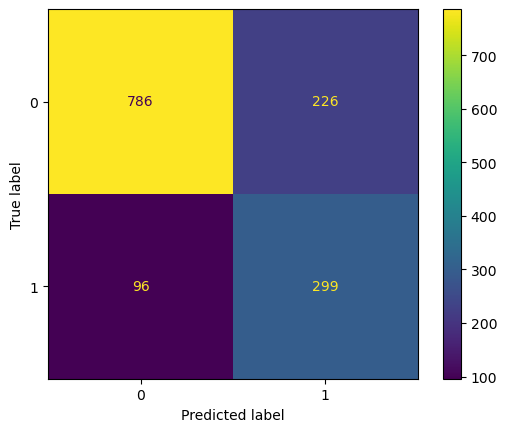

In [224]:
y_test_pred4=clf_gini.predict(X_test4_std)
y_train_pred4=clf_gini.predict(X_train4_std)
from sklearn.metrics import confusion_matrix as cm, ConfusionMatrixDisplay as cmd,classification_report as cr 
print(f"The confusion matrix is \n {cm(y_test4,y_test_pred4)}")
print(f"The classification report is \n {cr(y_test4,y_test_pred4)}")
print('Training set score: {:.4f}'.format(clf_gini.score(X_train4_std, y_train4)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test4_std, y_test4)))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm(y_test4,y_test_pred4), display_labels=clf_gini.classes_)
disp.plot()
plt.show()

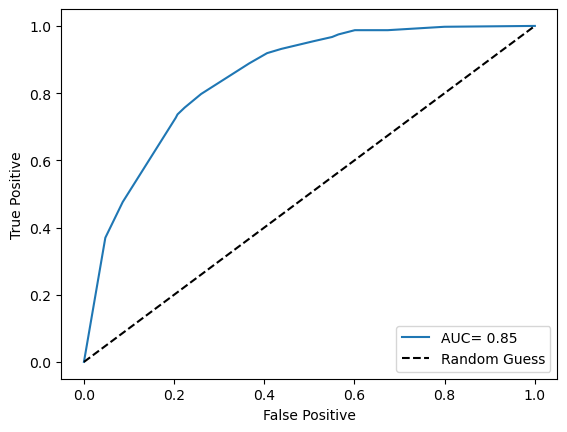

In [225]:
from sklearn.metrics import auc,roc_curve
probs4=clf_gini.predict_proba(X_test4_std)[:,1]
fpr,tpr,threshold=roc_curve(y_test4,probs4)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC= %0.2f" % roc_auc)
plt.plot([0,1],[0,1],"k--",label="Random Guess")
plt.legend(loc="lower right")
plt.ylabel("True Positive")
plt.xlabel("False Positive")
plt.show()

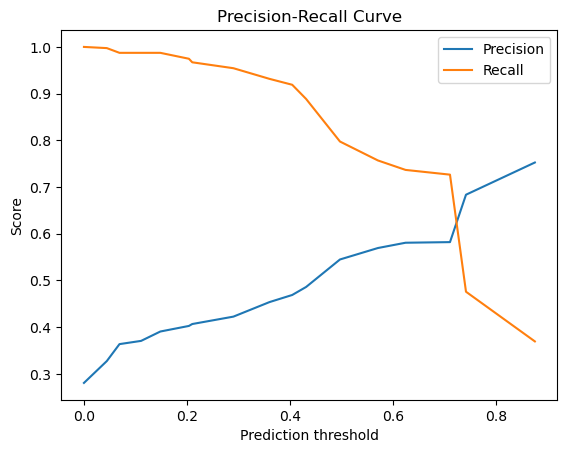

In [226]:
from sklearn.metrics import precision_recall_curve
probs4=clf_gini.predict_proba(X_test4_std)[:,1]
p_curve,r_curve,t_curve=precision_recall_curve(y_test4,probs4)
plt.figure()
plt.plot(t_curve,p_curve[:-1],label="Precision")
plt.plot(t_curve,r_curve[:-1],label="Recall")
plt.title("Precision-Recall Curve")
plt.xlabel("Prediction threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

## Analysis
<p>Medium Accuracy and both accuracies beat null accuracy, but no overfiting. However, at 50% threshold, low precision, but medium recall. To obtain higher recall, the threshold could be lowered and above 90% recall could be achieved, bu at high expenses of precisions. This model is not suitable for increase precision as the graph shows the precision could reach 80% at max at the expense of recall.</p>

### Prediction

In [229]:
test4=pd.concat([X_test4,y_test4],axis=1)
# prediction_data=test4.sample(0)
# print(prediction_data)
prediction=test4.sample(1)
X=prediction.drop("Churn Value",axis=1)
y=prediction["Churn Value"]
# y=prediction_data["Churn Value"]
X_std=std4.transform(X)
print(f"predicted value {clf_gini.predict(X_std)}")
print(f"observed value{y}")


predicted value [0]
observed value4035    0
Name: Churn Value, dtype: int64


## Entropy Decision Tree Model

In [231]:
df_kun=pd.read_excel("churn.xlsx").drop(["Churn Score","CLTV","Churn Label","Longitude","Latitude","City","Country","CustomerID","Count","State","Zip Code","Lat Long","Churn Reason"],axis=1)
df_kun["Total Charges"]=pd.to_numeric(df_kun["Total Charges"],errors="coerce")
df_kun=df_kun.dropna()
df_kun.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value'],
      dtype='object')

In [232]:
# Use the most correlated features
top_features=[
    'Tenure Months',
    'Internet Service',
    'Contract',
    'Payment Method',
    'Dependents',
    'Internet Service'
]
# apply all numeric columns 
numeric_cols=df_kun.drop("Churn Value", axis=1).select_dtypes("number").columns
#print(numeric_cols)
print(top_features)
#X5=pd.get_dummies(df_kun[top_features],drop_first=True)
X5=df_kun[numeric_cols]
y5=df_kun["Churn Value"]

['Tenure Months', 'Internet Service', 'Contract', 'Payment Method', 'Dependents', 'Internet Service']


In [233]:
from sklearn.model_selection import train_test_split
X_train5,X_test5,y_train5,y_test5=train_test_split(X5,y5,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
std5=StandardScaler()
X_train5_std=std5.fit_transform(X_train5)
X_test5_std=std5.transform(X_test5)


In [234]:
null_accuracy=(y_test5==0).mean()
null_accuracy

0.7192608386638237

In [235]:
clf_en = DecisionTreeClassifier(criterion='entropy',class_weight="balanced", max_depth=5, random_state=0)
clf_en.fit(X_train5_std, y_train5)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, random_state=0)

The confusion matrix is 
 [[703 309]
 [ 84 311]]
The classification report is 
               precision    recall  f1-score   support

           0       0.89      0.69      0.78      1012
           1       0.50      0.79      0.61       395

    accuracy                           0.72      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.78      0.72      0.73      1407

Training set score: 0.7161
Test set score: 0.7207


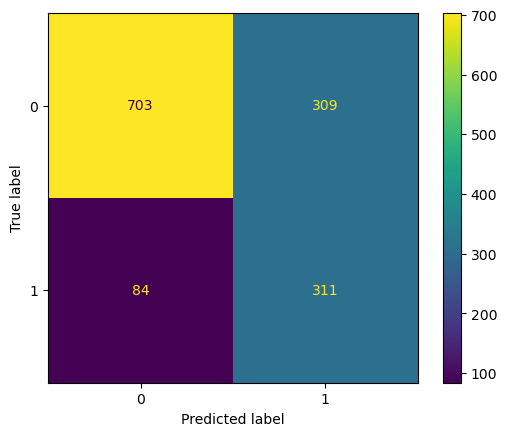

In [236]:
y_test_pred5=clf_en.predict(X_test5_std)
y_train_pred5=clf_en.predict(X_train5_std)
from sklearn.metrics import confusion_matrix as cm, ConfusionMatrixDisplay as cmd,classification_report as cr 
print(f"The confusion matrix is \n {cm(y_test5,y_test_pred5)}")
print(f"The classification report is \n {cr(y_test5,y_test_pred5)}")
print('Training set score: {:.4f}'.format(clf_en.score(X_train5_std, y_train5)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test5_std, y_test5)))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm(y_test5,y_test_pred5), display_labels=clf_en.classes_)
disp.plot()
plt.show()

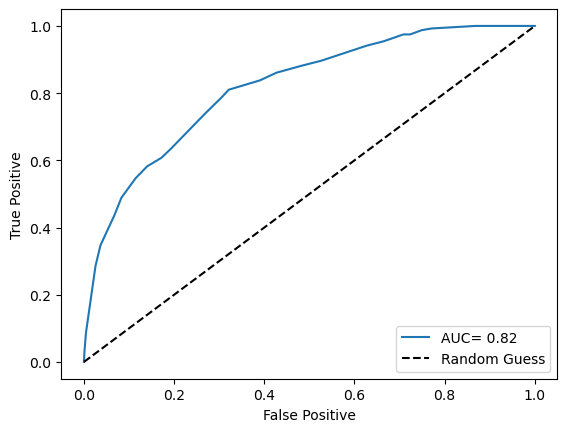

In [237]:
from sklearn.metrics import auc,roc_curve
probs5=clf_en.predict_proba(X_test5_std)[:,1]
fpr,tpr,threshold=roc_curve(y_test5,probs5)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC= %0.2f" % roc_auc)
plt.plot([0,1],[0,1],"k--",label="Random Guess")
plt.legend(loc="lower right")
plt.ylabel("True Positive")
plt.xlabel("False Positive")
plt.show()

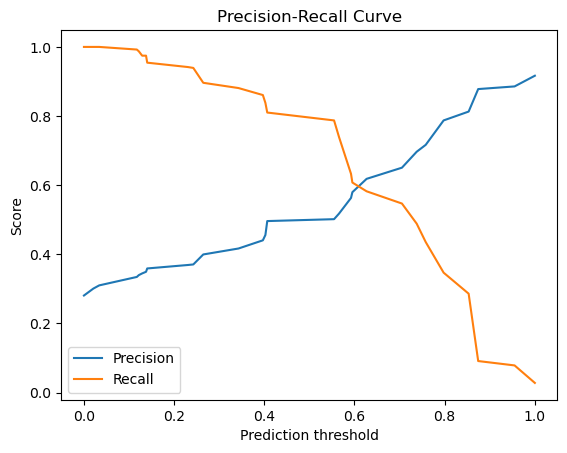

In [238]:
from sklearn.metrics import precision_recall_curve
probs5=clf_en.predict_proba(X_test5_std)[:,1]
p_curve,r_curve,t_curve=precision_recall_curve(y_test5,probs5)
plt.figure()
plt.plot(t_curve,p_curve[:-1],label="Precision")
plt.plot(t_curve,r_curve[:-1],label="Recall")
plt.title("Precision-Recall Curve")
plt.xlabel("Prediction threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

## Analysis
<p>Medium Accuracy and both accuracies beat null accuracy, but no overfiting. However, at 50% threshold, low precision, but medium recall. At 0% threshold, precision is aleady 30%. To obtain higher recall, the threshold could be lowered and above 90% recall could be achieved, bu at high expenses of precisions. This model is not suitable for increase precision as the graph shows the precision could reach 90% at max at the expense of recall. It is, however, suitable for higher recall. </p>

### Predictions

In [241]:
test5=pd.concat([X_test5,y_test5],axis=1)
# prediction_data=test4.sample(0)
# print(prediction_data)
prediction=test5.sample(1)
X=prediction.drop("Churn Value",axis=1)
y=prediction["Churn Value"]
# y=prediction_data["Churn Value"]
X_std=std5.transform(X)
print(f"predicted value {clf_en.predict(X_std)}")
print(f"observed value{y}")


predicted value [1]
observed value1498    1
Name: Churn Value, dtype: int64


# 4. Random Forest Model

## 4.1. Random Forest Model (With Churn Score)

In [244]:
df_kun=pd.read_excel("churn.xlsx").drop(["Churn Label","Longitude","Latitude","City","Country","CustomerID","Count","State","Zip Code","Lat Long","Churn Reason"],axis=1)
df_kun["Total Charges"]=pd.to_numeric(df_kun["Total Charges"],errors="coerce")
df_kun=df_kun.dropna()
df_kun.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV'],
      dtype='object')

In [245]:
top_features=[
 #'Churn Value',
 'Churn Score',
 'Contract',
 #'Tenure Months',
 #'Online Security',
 #'Tech Support',
 #'Dependents',
# 'Total Charges',
 #'Online Backup',
 #'Paperless Billing'
]

X6=df_kun[top_features]
y6=df_kun["Churn Value"]

In [246]:
from sklearn.model_selection import train_test_split
X_train6,X_test6,y_train6,y_test6=train_test_split(X6,y6,test_size=0.2,random_state=42)
from sklearn.preprocessing import OrdinalEncoder
encoder7=OrdinalEncoder()
X_train6_encoder=encoder7.fit_transform(X_train6)
X_test6_encoder=encoder7.transform(X_test6)
from sklearn.preprocessing import StandardScaler
std6=StandardScaler()
X_train6_std=std6.fit_transform(X_train6_encoder)
X_test6_std=std6.transform(X_test6_encoder)

#### Get the best params with GridSearchCV

In [248]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
param_grid={"n_estimators":[100,200,300,400,500]}
rf_model=GridSearchCV(rf,param_grid=param_grid)
rf_model.fit(X_train6_std,y_train6)
rf_model.best_params_

{'n_estimators': 100}

#### Create a new random forest model with the best param

In [250]:
n=rf_model.best_params_["n_estimators"]
rf_prime=RandomForestClassifier(n_estimators=n, random_state=0)
rf_prime.fit(X_train6_std, y_train6)
y_test_pred6=rf_prime.predict(X_test6_std)
y_train_pred6=rf_prime.predict(X_train6_std)
from sklearn.metrics import confusion_matrix as cm, classification_report as cr, accuracy_score as accuracy
cm6=cm(y_test_pred6,y_test6)
report=cr(y_test6,y_test_pred6)
score_test=accuracy(y_test6,y_test_pred6)
score_train=accuracy(y_train6,y_train_pred6)
print(f"confusion matrix is \n {cm6}")
print(f"classification report is \n {report}")
print(f"training accuracy score is {score_train}")
print(f"testing accuracy score is {score_test}")

confusion matrix is 
 [[914  62]
 [ 98 333]]
classification report is 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      1012
           1       0.77      0.84      0.81       395

    accuracy                           0.89      1407
   macro avg       0.85      0.87      0.86      1407
weighted avg       0.89      0.89      0.89      1407

training accuracy score is 0.9066666666666666
testing accuracy score is 0.8862828713574982


#### high accuracy score, lower precision, not overfit. Good for recall. but not for precision. Great model.

### RandomForest with top features(The same above since only two features)

In [253]:
feature_scores = pd.Series(rf_prime.feature_importances_, index=X_train6.columns).sort_values(ascending=False)
feature_scores

Churn Score    0.839983
Contract       0.160017
dtype: float64

#### Select the top features and retrain the random forest model

In [255]:
lst=feature_scores.iloc[:1].index.tolist()
lst

['Churn Score']

In [256]:
X8=df_kun[lst]
y8=df_kun["Churn Value"]
from sklearn.model_selection import train_test_split
X_train8,X_test8,y_train8,y_test8=train_test_split(X8,y8,test_size=0.2,random_state=42)
from sklearn.preprocessing import OrdinalEncoder
encoder8=OrdinalEncoder()
X_train_en8=encoder8.fit_transform(X_train8)
X_test_en8=encoder8.transform(X_test8)
from sklearn.preprocessing import StandardScaler
std8=StandardScaler()
X_train8_std=std8.fit_transform(X_train_en8)
X_test8_std=std8.transform(X_test_en8)

#### Use GridSearch looking for the best parameter

In [258]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier(random_state=0)
param_grid={"n_estimators":[100,200,300,400,500]}
rf_model2=GridSearchCV(rf2,param_grid=param_grid)
rf_model2.fit(X_train8_std,y_train8)
rf_model2.best_params_

{'n_estimators': 100}

## Build a new model with the best parameterm

confusion matrix is 
 [[1012    0]
 [ 192  203]]
classification report is 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1012
           1       1.00      0.51      0.68       395

    accuracy                           0.86      1407
   macro avg       0.92      0.76      0.80      1407
weighted avg       0.89      0.86      0.85      1407

test accuracy score is 0.8635394456289979
train accuracy score is 0.8885333333333333


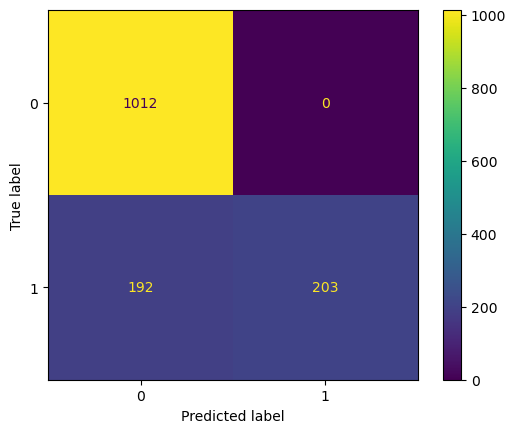

In [260]:
n2=rf_model2.best_params_["n_estimators"]
rf_prime2=RandomForestClassifier(n_estimators=n2, random_state=0)
rf_prime2.fit(X_train8_std, y_train8)
y_test_pred8=rf_prime2.predict(X_test8_std)
y_train_pred8=rf_prime2.predict(X_train8_std)
from sklearn.metrics import confusion_matrix as cm, classification_report as cr, accuracy_score as accuracy
cm8=cm(y_test8,y_test_pred8)
report8=cr(y_test8,y_test_pred8)
test_score=accuracy(y_test8,y_test_pred8)
train_score=accuracy(y_train8,y_train_pred8)
print(f"confusion matrix is \n {cm8}")
print(f"classification report is \n {report8}")
print(f"test accuracy score is {test_score}")
print(f"train accuracy score is {train_score}")
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm8, display_labels=rf_prime2.classes_)
disp.plot()
plt.show()

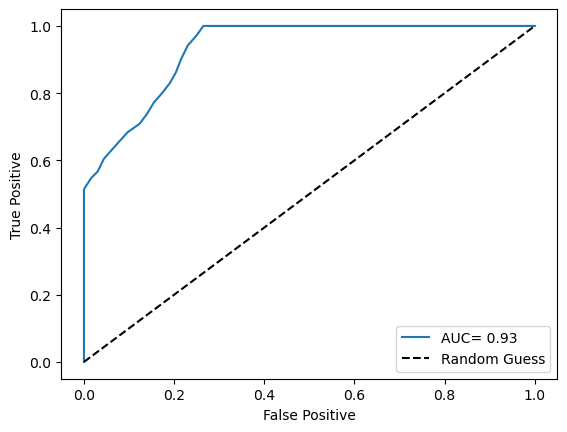

In [261]:
from sklearn.metrics import auc,roc_curve
probs=rf_prime2.predict_proba(X_test8_std)[:,1]
fpr,tpr,threshold=roc_curve(y_test8,probs)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC= %0.2f" % roc_auc)
plt.plot([0,1],[0,1],"k--",label="Random Guess")
plt.legend(loc="lower right")
plt.ylabel("True Positive")
plt.xlabel("False Positive")
plt.show()

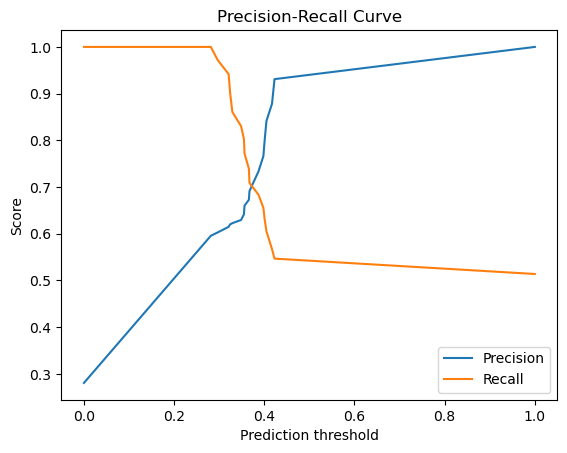

In [262]:
from sklearn.metrics import precision_recall_curve
probs=rf_prime2.predict_proba(X_test8_std)[:,1]
p_curve,r_curve,t_curve=precision_recall_curve(y_test8,probs)
plt.figure()
plt.plot(t_curve,p_curve[:-1],label="Precision")
plt.plot(t_curve,r_curve[:-1],label="Recall")
plt.title("Precision-Recall Curve")
plt.xlabel("Prediction threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

#### Slightly overfited, perfect precision, but low recall.High accuracy. Avoid if the goal is to increase recall. The model with two features were better.

## Prediction with two feature random forest model

In [265]:
test6=pd.concat([X_test6,y_test6],axis=1)
prediction_data=test6.sample(1)
print(prediction_data)
X=prediction_data[["Churn Score","Contract"]]
y=prediction_data["Churn Value"]
X_encode=encoder7.transform(X)
X_std=std6.transform(X_encode)
rf_prime.predict(X_std)

      Churn Score        Contract  Churn Value
1199           80  Month-to-month            1


array([0])

## Prediction with only one feature random forest model

In [267]:
test8=pd.concat([X_test8,y_test8],axis=1)
prediction_data8=test8.sample(1)
print(prediction_data8)
X=prediction_data[["Churn Score"]]
y=prediction_data["Churn Value"]
X_encode=encoder8.transform(X)
X_std=std8.transform(X_encode)
rf_prime2.predict(X_std)

      Churn Score  Churn Value
3158           40            0


array([0])

## 4.2. Random Forest Model (Without Churn Score)

In [269]:
df_kun=pd.read_excel("churn.xlsx").drop(["Churn Score","CLTV","Churn Label","Longitude","Latitude","City","Country","CustomerID","Count","State","Zip Code","Lat Long","Churn Reason"],axis=1)
df_kun["Total Charges"]=pd.to_numeric(df_kun["Total Charges"],errors="coerce")
df_kun=df_kun.dropna()
df_kun.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value'],
      dtype='object')

In [270]:
# Use the most correlated features
numeric_cols=df_kun.drop("Churn Value", axis=1).select_dtypes("number").columns
print(numeric_cols)
#X6=pd.get_dummies(df_kun[top_features],drop_first=True)
X6=df_kun[numeric_cols]
y6=df_kun["Churn Value"]

Index(['Tenure Months', 'Monthly Charges', 'Total Charges'], dtype='object')


In [271]:
from sklearn.model_selection import train_test_split
X_train6,X_test6,y_train6,y_test6=train_test_split(X6,y6,test_size=0.2,random_state=42)
std6=StandardScaler()
X_train6_std=std6.fit_transform(X_train6)
X_test6_std=std6.transform(X_test6)

In [272]:
null_accuracy=(y_test6==0).mean()
null_accuracy

0.7192608386638237

#### Get the best params with GridSearchCV

In [274]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0,class_weight="balanced")
param_grid={"n_estimators":[100,200,300,400,500]}
rf_model=GridSearchCV(rf,param_grid=param_grid)
rf_model.fit(X_train6_std,y_train6)
#rf_model.fit(X_train6,y_train6)
rf_model.best_params_

{'n_estimators': 100}

In [275]:
params6=rf_model.best_params_
rf_prime=RandomForestClassifier(**params6, class_weight="balanced",random_state=0)
rf_prime.fit(X_train6, y_train6)
y_test_pred6=rf_prime.predict(X_test6)
y_train_pred6=rf_prime.predict(X_train6)
from sklearn.metrics import confusion_matrix as cm, classification_report as cr, accuracy_score as accuracy
cm6=cm(y_test_pred6,y_test6)
report=cr(y_test6,y_test_pred6)
score_test6=accuracy(y_test6,y_test_pred6)
score_train6=accuracy(y_train6,y_train_pred6)
print(f"confusion matrix is \n {cm6}")
print(f"classification report is \n {report}")
print(f"training accuracy score is {score_train6}")
print(f"testing accuracy score is {score_test6}")

confusion matrix is 
 [[889 215]
 [123 180]]
classification report is 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1012
           1       0.59      0.46      0.52       395

    accuracy                           0.76      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.75      0.76      0.75      1407

training accuracy score is 0.9872
testing accuracy score is 0.759772565742715


## top features

In [277]:
feature_scores = pd.Series(rf_prime.feature_importances_, index=X_train6.columns).sort_values(ascending=False)
feature_scores

Monthly Charges    0.385693
Total Charges      0.381252
Tenure Months      0.233055
dtype: float64

In [278]:
top_features2=feature_scores.iloc[:6].index.tolist()
top_features2=["Total Charges",
               "Monthly Charges",
              # "Tenure Months",
              # "Internet Service",
               # "Dependents",
               # "Payment Method"
              ]

In [279]:
X8=pd.get_dummies(df_kun[top_features2],drop_first=True)
y8=df_kun["Churn Value"]

from sklearn.model_selection import train_test_split
X_train8,X_test8,y_train8,y_test8=train_test_split(X8,y8,test_size=0.2,random_state=42)
std8=StandardScaler()
X_train8_std=std8.fit_transform(X_train8)
X_test8_std=std8.transform(X_test8)

#### Use GridSearch looking for the best parameter

In [281]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier(random_state=0,class_weight="balanced")
param_grid={"n_estimators":[100,200,300,400,500,600]}
rf_model2=GridSearchCV(rf2,param_grid=param_grid)
rf_model2.fit(X_train8_std,y_train8)
rf_model2.best_params_

{'n_estimators': 600}

## Build a new model with the best parameters

confusion matrix is 
 [[906 106]
 [205 190]]
classification report is 
               precision    recall  f1-score   support

           0       0.82      0.90      0.85      1012
           1       0.64      0.48      0.55       395

    accuracy                           0.78      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

train accuracy score is 0.9877333333333334
test accuracy score is 0.7789623312011372


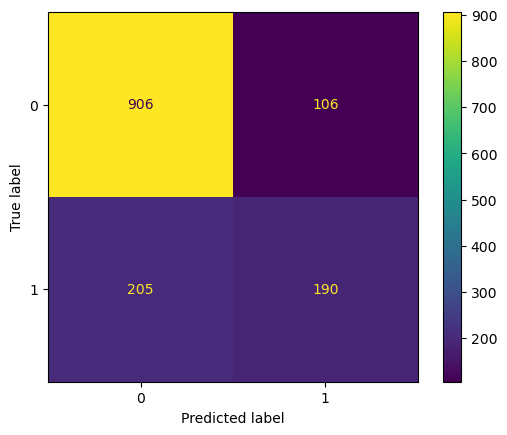

In [283]:
params8=rf_model2.best_params_
rf_prime2=RandomForestClassifier(**params8, random_state=0,class_weight="balanced")
rf_prime2.fit(X_train8_std, y_train8)
y_test_pred8=rf_prime2.predict(X_test8_std)
y_train_pred8=rf_prime2.predict(X_train8_std)
from sklearn.metrics import confusion_matrix as cm, classification_report as cr, accuracy_score as accuracy
cm8=cm(y_test8,y_test_pred8)
report8=cr(y_test8,y_test_pred8)
test_score8=accuracy(y_test8,y_test_pred8)
train_score8=accuracy(y_train8,y_train_pred8)
print(f"confusion matrix is \n {cm8}")
print(f"classification report is \n {report8}")
print(f"train accuracy score is {train_score8}")
print(f"test accuracy score is {test_score8}")
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm8, display_labels=rf_prime2.classes_)
disp.plot()
plt.show()

#### Analysis
<p>It's very overfitted model. Train accuracy is 98.77%, but test accuracy is 77.40%. Precision is 63% and recall 47%. Not a very good model for prediction. With feature importances, it's not making any differences</p>

## Prediction

In [286]:
test6=pd.concat([X_test6,y_test6],axis=1)
# prediction_data=test4.sample(0)
# print(prediction_data)
prediction=test6.sample(1)
X=prediction.drop("Churn Value",axis=1)
y=prediction["Churn Value"]
# y=prediction_data["Churn Value"]
X_std=std6.transform(X)
print(f"predicted value {rf_model.predict(X_std)}")
print(f"observed value{y}")


predicted value [0]
observed value5794    0
Name: Churn Value, dtype: int64


# 5. Support Vector Machine

## 5.1. Support Vector Classifier (SVC) with 5 Numerical Features

### Prepare Data

In [290]:
df2.head()

Gender Senior Citizen Partner Dependents  Tenure Months Phone Service  \
0    Male             No      No         No              2           Yes   
1  Female             No      No        Yes              2           Yes   
2  Female             No      No        Yes              8           Yes   
3  Female             No     Yes        Yes             28           Yes   
4    Male             No      No        Yes             49           Yes   

  Multiple Lines Internet Service Online Security Online Backup  ...  \
0             No              DSL             Yes           Yes  ...   
1             No      Fiber optic              No            No  ...   
2            Yes      Fiber optic              No            No  ...   
3            Yes      Fiber optic              No            No  ...   
4            Yes      Fiber optic              No           Yes  ...   

  Streaming Movies        Contract Paperless Billing  \
0               No  Month-to-month               Yes   
1               No  Month-to-month               Yes   
2              Yes  Month-to-month               Yes   
3              Yes  Month-to-month               Yes   
4              Yes  Month-to-month               Yes   

              Payment Method Monthly Charges Total Charges Churn Label  \
0               Mailed check           53.85        108.15         Yes   
1           Electronic check           70.70        151.65         Yes   
2           Electronic check           99.65        820.50         Yes   
3           Electronic check          104.80       3046.05         Yes   
4  Bank transfer (automatic)          103.70       5036.30         Yes   

   Churn Score  CLTV Tenure Group  
0           86  3239         1-12  
1           67  2701         1-12  
2           86  5372         1-12  
3           84  5003        25-36  
4           89  5340        49-60  

[5 rows x 23 columns]

In [291]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             7032 non-null   object  
 1   Senior Citizen     7032 non-null   object  
 2   Partner            7032 non-null   object  
 3   Dependents         7032 non-null   object  
 4   Tenure Months      7032 non-null   int64   
 5   Phone Service      7032 non-null   object  
 6   Multiple Lines     7032 non-null   object  
 7   Internet Service   7032 non-null   object  
 8   Online Security    7032 non-null   object  
 9   Online Backup      7032 non-null   object  
 10  Device Protection  7032 non-null   object  
 11  Tech Support       7032 non-null   object  
 12  Streaming TV       7032 non-null   object  
 13  Streaming Movies   7032 non-null   object  
 14  Contract           7032 non-null   object  
 15  Paperless Billing  7032 non-null   object  
 16  Payment Met

### DataFrame With 5 Numerical Features + Target Variable

In [293]:
numerical_col_svc = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV','Churn Score','Churn Label']

In [294]:
df_numerical_svc = df2[numerical_col_svc]

In [295]:
df_numerical_svc.reset_index(drop=True,inplace=True)

In [296]:
df_numerical_svc.head()

Tenure Months  Monthly Charges  Total Charges  CLTV  Churn Score  \
0              2            53.85         108.15  3239           86   
1              2            70.70         151.65  2701           67   
2              8            99.65         820.50  5372           86   
3             28           104.80        3046.05  5003           84   
4             49           103.70        5036.30  5340           89   

  Churn Label  
0         Yes  
1         Yes  
2         Yes  
3         Yes  
4         Yes

### Define GridSearchCV Parameters Grid

In [298]:
param_grid_svc_n = {
    'svc__C': [0.001, 0.01, 0.1, 0.5, 1],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto'],
    'svc__degree': [2, 3, 4]  # Applies if the model uses 'poly' kernel
}

### Define Pipeline

In [300]:
pipeline_grid_svc_n = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(class_weight='balanced',random_state=101))
])

### Use GridSearchCV with the pipeline

In [302]:
from sklearn.model_selection import GridSearchCV

grid_svc_n = GridSearchCV(pipeline_grid_svc_n, param_grid=param_grid_svc_n, cv=5, scoring='accuracy')

### Split Data

In [304]:
X_grid_svc_n = df_numerical_svc.drop('Churn Label', axis=1)
y_grid_svc_n = df_numerical_svc['Churn Label']

In [305]:
# Train-test split
X_train_grid_svc_n, X_test_grid_svc_n, y_train_grid_svc_n, y_test_grid_svc_n = train_test_split(X_grid_svc_n, y_grid_svc_n, test_size=0.2, random_state=101)

### Fit Model

In [307]:
grid_svc_n.fit(X_train_grid_svc_n, y_train_grid_svc_n)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 0.5, 1],
                         'svc__degree': [2, 3, 4],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

### Best Parameters

In [309]:
grid_svc_n.best_params_

{'svc__C': 1, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}

### Evaluate Model

In [311]:
y_pred_grid_svc_n = grid_svc_n.predict(X_test_grid_svc_n)

In [312]:
from sklearn.metrics import confusion_matrix

cm_grid_svc_n = confusion_matrix(y_test_grid_svc_n, y_pred_grid_svc_n)
cm_grid_svc_n

array([[919, 100],
       [ 32, 356]])

In [313]:
print('Confusion matrix\n\n', cm_grid_svc_n)

print('\nTrue Positives(TP) = ', cm_grid_svc_n[0,0])

print('\nTrue Negatives(TN) = ', cm_grid_svc_n[1,1])

print('\nFalse Positives(FP) = ', cm_grid_svc_n[0,1])

print('\nFalse Negatives(FN) = ', cm_grid_svc_n[1,0])

Confusion matrix

 [[919 100]
 [ 32 356]]

True Positives(TP) =  919

True Negatives(TN) =  356

False Positives(FP) =  100

False Negatives(FN) =  32


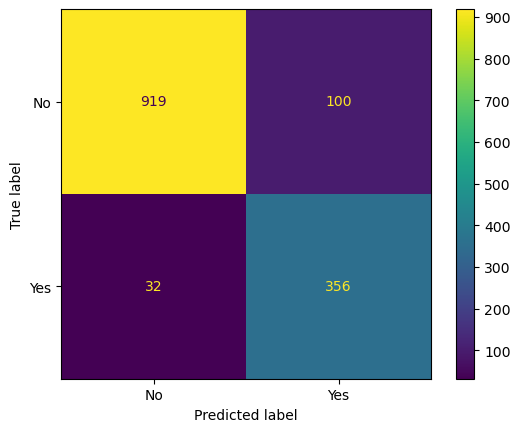

In [314]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm_grid_svc_n, display_labels=grid_svc_n.classes_)
disp.plot()
plt.show()

In [315]:
from sklearn.metrics import classification_report, accuracy_score as accuracy

print(classification_report(y_test_grid_svc_n,y_pred_grid_svc_n))

y_train_pred_grid_svc_n = grid_svc_n.predict(X_train_grid_svc_n)
test_score=accuracy(y_test_grid_svc_n,y_pred_grid_svc_n)
train_score=accuracy(y_train_grid_svc_n,y_train_pred_grid_svc_n)
print(f"test accuracy score is {test_score}")
print(f"train accuracy score is {train_score}")

              precision    recall  f1-score   support

          No       0.97      0.90      0.93      1019
         Yes       0.78      0.92      0.84       388

    accuracy                           0.91      1407
   macro avg       0.87      0.91      0.89      1407
weighted avg       0.92      0.91      0.91      1407

test accuracy score is 0.906183368869936
train accuracy score is 0.9009777777777778


### Insights

- Overall :
  - **High Accuracy Score** : 91% accuracy, with weighted average F1-score of 0.91 suggests the model is balanced and performs well across both classes.
  - However, there might be a trade-off between precision and recall for the churn class.
    - For **Churn Prediction** 'Yes' Label (Churn Class):
      - **High Recall Score** 0.92 - Low False Negative, meanning that only small amount (8%) of actual churners are falsely predicted as non-churner. But it correctly capturing 90% of the customers who truly churned.
      - **Slightly low precision score** 0.78- Slightly More False Positive, meanning that 22% of predicted churn cases were incorrectly classified as churn when they were not in reality.

  - This model is **effective at identifying churn**, with high recall but slightly lower precision. which might be generally acceptable in churn analysis, as it’s often better to have some false positives than to miss actual churn cases.

<function matplotlib.pyplot.show(close=None, block=None)>

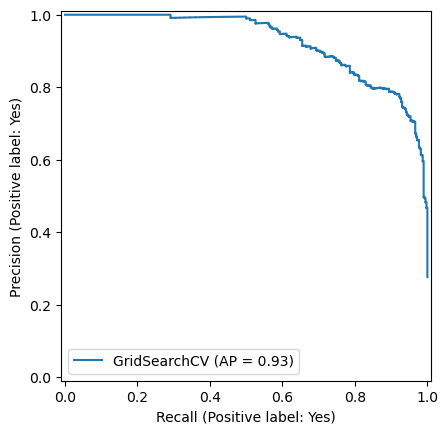

In [318]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(estimator=grid_svc_n, X= X_test_grid_svc_n, y=y_test_grid_svc_n)
plt.show

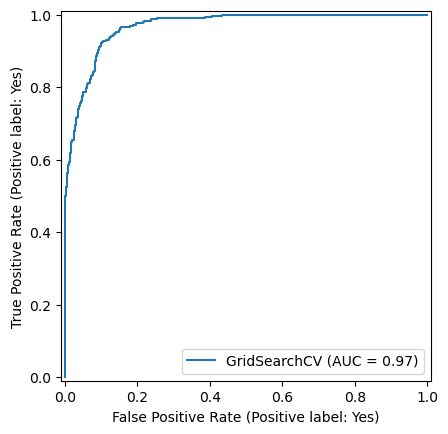

In [319]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(estimator=grid_svc_n, X= X_test_grid_svc_n, y=y_test_grid_svc_n)
plt.show()

### Make a Prediction

In [321]:
# Extracting 2 rows from test set
X_test_grid_svc_n

Tenure Months  Monthly Charges  Total Charges  CLTV  Churn Score
4246              3            29.80          94.40  5614           32
2909             60            99.80        5985.75  6213           38
1564             13            98.00        1237.85  3714           99
5218             19            20.20         387.40  4821           60
4419             55            55.70        3131.80  4149           61
...             ...              ...            ...   ...          ...
353               3            54.70         169.45  3335           66
914               1            20.90          20.90  5527           97
4902             19            94.95        1760.25  5316           40
1250             24            99.30        2431.35  4811           69
240               2            44.95          85.15  5900           84

[1407 rows x 5 columns]

In [322]:
X_test_grid_svc_n.iloc[2:4]

Tenure Months  Monthly Charges  Total Charges  CLTV  Churn Score
1564             13             98.0        1237.85  3714           99
5218             19             20.2         387.40  4821           60

In [323]:
y_pred_grid_svc_n_2 = grid_svc_n.predict(X_test_grid_svc_n.iloc[2:4])

In [324]:
# Predicted Churn Label
y_pred_grid_svc_n_2

array(['Yes', 'No'], dtype=object)

In [325]:
# True Churn Label
y_test_grid_svc_n.iloc[2:4]

1564    Yes
5218     No
Name: Churn Label, dtype: object

## 5.2. SVC With 4 Numerical Features (Excluding Churn Score) + Top 3 Categorical Features

<div style="text-align: justify">  In the following, we intentionally exclude the "Churn Score" feature to assess how well the model performs without it. According to the official documentation, "Churn Score" is a value generated by IBM SPSS Modeler’s predictive tool, combining various factors that influence churn. The higher the score, the more likely the customer will churn.
<br></br>
Our previous analysis has proved that "Churn Score" is a significant predictor. However, since it’s derived from an existing model, we are interested in exploring our model’s performance independently of this feature. This will help us evaluate the predictive power of other influential features.
<br></br>
After testing multiple models, we found that the Support Vector Classifier (SVC) performs best when "Churn Score" is excluded. Thus, we will therefore demonstrate the SVC model. 
<br></br>
Let’s proceed with SVC model without 'Churn Score' feature!
</div>

### Prepare Data

In [329]:
df_dummies.head()

Tenure Months  Monthly Charges  Total Charges  Churn Score  CLTV  \
0              2            53.85         108.15           86  3239   
1              2            70.70         151.65           67  2701   
2              8            99.65         820.50           86  5372   
3             28           104.80        3046.05           84  5003   
4             49           103.70        5036.30           89  5340   

   Gender_Male  Senior Citizen_Yes  Partner_Yes  Dependents_Yes  \
0         True               False        False           False   
1        False               False        False            True   
2        False               False        False            True   
3        False               False         True            True   
4         True               False        False            True   

   Phone Service_Yes  ...  Streaming TV_Yes  \
0               True  ...             False   
1               True  ...             False   
2               True  ...              True   
3               True  ...              True   
4               True  ...              True   

   Streaming Movies_No internet service  Streaming Movies_Yes  \
0                                 False                 False   
1                                 False                 False   
2                                 False                  True   
3                                 False                  True   
4                                 False                  True   

   Contract_One year  Contract_Two year  Paperless Billing_Yes  \
0              False              False                   True   
1              False              False                   True   
2              False              False                   True   
3              False              False                   True   
4              False              False                   True   

   Payment Method_Credit card (automatic)  Payment Method_Electronic check  \
0                                   False                            False   
1                                   False                             True   
2                                   False                             True   
3                                   False                             True   
4                                   False                            False   

   Payment Method_Mailed check  Churn Label_Yes  
0                         True             True  
1                        False             True  
2                        False             True  
3                        False             True  
4                        False             True  

[5 rows x 33 columns]

In [330]:
df_dummies.columns

Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score',
       'CLTV', 'Gender_Male', 'Senior Citizen_Yes', 'Partner_Yes',
       'Dependents_Yes', 'Phone Service_Yes',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No internet service', 'Streaming TV_Yes',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Contract_One year', 'Contract_Two year', 'Paperless Billing_Yes',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check',
       'Churn Label_Yes'],
      dtype='object')

In [331]:
# DataFrame with Categorical Columns Only
X_svc_2 = df_dummies.drop(['Churn Label_Yes',
                           'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score','CLTV'],axis=1)
y_svc_2 = df_dummies['Churn Label_Yes']

In [332]:
from sklearn.model_selection import train_test_split

X_train_svc_2, X_test_svc_2, y_train_svc_2, y_test_svc_2 = train_test_split(X_svc_2, y_svc_2, test_size = 0.2, random_state = 101)

### Using SelectKBest + Chi-squared Score to Obtain Top 3 Categorical Feaures

In [334]:
from sklearn.feature_selection import SelectKBest, chi2

# Initialize SelectKBest with chi2, choose top 5 features
selector_svc_all = SelectKBest(score_func=chi2, k=3)

# Fit and transform training data only
X_train_svc_selected_2 = selector_svc_all.fit_transform(X_train_svc_2, y_train_svc_2)

# Get the selected feature names
svc_selected_features_2 = selector_svc_all.get_feature_names_out(X_svc_2.columns)

# View top 5 features
svc_selected_features_2

array(['Internet Service_Fiber optic', 'Contract_Two year',
       'Payment Method_Electronic check'], dtype=object)

### Build Model - Prepare Data Using Numerical Features (Excluding Churn Score) + Top 3 Categorical Features

In [336]:
df2.head()

Gender Senior Citizen Partner Dependents  Tenure Months Phone Service  \
0    Male             No      No         No              2           Yes   
1  Female             No      No        Yes              2           Yes   
2  Female             No      No        Yes              8           Yes   
3  Female             No     Yes        Yes             28           Yes   
4    Male             No      No        Yes             49           Yes   

  Multiple Lines Internet Service Online Security Online Backup  ...  \
0             No              DSL             Yes           Yes  ...   
1             No      Fiber optic              No            No  ...   
2            Yes      Fiber optic              No            No  ...   
3            Yes      Fiber optic              No            No  ...   
4            Yes      Fiber optic              No           Yes  ...   

  Streaming Movies        Contract Paperless Billing  \
0               No  Month-to-month               Yes   
1               No  Month-to-month               Yes   
2              Yes  Month-to-month               Yes   
3              Yes  Month-to-month               Yes   
4              Yes  Month-to-month               Yes   

              Payment Method Monthly Charges Total Charges Churn Label  \
0               Mailed check           53.85        108.15         Yes   
1           Electronic check           70.70        151.65         Yes   
2           Electronic check           99.65        820.50         Yes   
3           Electronic check          104.80       3046.05         Yes   
4  Bank transfer (automatic)          103.70       5036.30         Yes   

   Churn Score  CLTV Tenure Group  
0           86  3239         1-12  
1           67  2701         1-12  
2           86  5372         1-12  
3           84  5003        25-36  
4           89  5340        49-60  

[5 rows x 23 columns]

In [337]:
df_svc_top7 = df2[['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV',  # 4 numerical columns
                   'Contract','Internet Service', 'Payment Method',              # top 3 categorical columns
                   'Churn Label']]

In [338]:
df_svc_top7.reset_index(drop=True, inplace=True)

In [339]:
df_svc_top7.head()

Tenure Months  Monthly Charges  Total Charges  CLTV        Contract  \
0              2            53.85         108.15  3239  Month-to-month   
1              2            70.70         151.65  2701  Month-to-month   
2              8            99.65         820.50  5372  Month-to-month   
3             28           104.80        3046.05  5003  Month-to-month   
4             49           103.70        5036.30  5340  Month-to-month   

  Internet Service             Payment Method Churn Label  
0              DSL               Mailed check         Yes  
1      Fiber optic           Electronic check         Yes  
2      Fiber optic           Electronic check         Yes  
3      Fiber optic           Electronic check         Yes  
4      Fiber optic  Bank transfer (automatic)         Yes

### Split Data

In [341]:
X_svc_top7 = df_svc_top7.drop('Churn Label',axis=1)
y_svc_top7 = df_svc_top7['Churn Label']

### Define Grid Parameters

In [343]:
param_grid_svc_top7 = {
    'svc__C': [0.001, 0.1, 0.5, 1],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto'],
    'svc__degree': [2, 3, 4]  # Applies if the model uses 'poly' kernel
}

### Define Pipeline

In [345]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [346]:
cat_nominal = ['Internet Service', 'Payment Method']

preprocessor = ColumnTransformer(transformers=
                                 [('encoder_ordinal', OrdinalEncoder(categories=[np.sort(df.Contract.unique())]), ['Contract']),
                                 ('encoder_nominal', OneHotEncoder(drop='first'), cat_nominal)], 
                                 remainder='passthrough')


pipeline_grid_svc_top7 = Pipeline([
    ('preprocessor',preprocessor),
    ('scaler', StandardScaler()),
    ('svc', SVC(class_weight='balanced',random_state=101))
])

### Use GridSearchCV with Pipeline

In [348]:
from sklearn.model_selection import GridSearchCV

grid_svc_top7 = GridSearchCV(pipeline_grid_svc_top7, param_grid= param_grid_svc_top7 , cv=5, scoring='accuracy')

### Split Data

In [350]:
#Train-test split
X_train_grid_svc_top7, X_test_grid_svc_top7, y_train_grid_svc_top7, y_test_grid_svc_top7 = train_test_split(X_svc_top7, y_svc_top7, test_size=0.2, random_state=101)

### Fit GridSearchCV Model

In [352]:
grid_svc_top7.fit(X_train_grid_svc_top7, y_train_grid_svc_top7)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder_ordinal',
                                                                         OrdinalEncoder(categories=[array(['Month-to-month', 'One year', 'Two year'], dtype=object)]),
                                                                         ['Contract']),
                                                                        ('encoder_nominal',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Internet '
                                                                          'Service',
                                                                          'Payment '
                                                                          'Method'])])),
                                       ('scaler', StandardScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             param_grid={'svc__C': [0.001, 0.1, 0.5, 1],
                         'svc__degree': [2, 3, 4],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

### Best Parameters

In [354]:
grid_svc_top7.best_params_

{'svc__C': 0.5, 'svc__degree': 4, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}

### Evaluate Model

In [356]:
y_pred_grid_svc_top7 = grid_svc_top7.predict(X_test_grid_svc_top7)

In [357]:
from sklearn.metrics import confusion_matrix

cm_grid_svc_top7 = confusion_matrix(y_test_grid_svc_top7, y_pred_grid_svc_top7)
cm_grid_svc_top7

array([[772, 247],
       [ 94, 294]])

In [358]:
print('Confusion matrix\n\n', cm_grid_svc_top7)

print('\nTrue Positives(TP) = ', cm_grid_svc_top7[0,0])

print('\nTrue Negatives(TN) = ', cm_grid_svc_top7[1,1])

print('\nFalse Positives(FP) = ', cm_grid_svc_top7[0,1])

print('\nFalse Negatives(FN) = ', cm_grid_svc_top7[1,0])

Confusion matrix

 [[772 247]
 [ 94 294]]

True Positives(TP) =  772

True Negatives(TN) =  294

False Positives(FP) =  247

False Negatives(FN) =  94


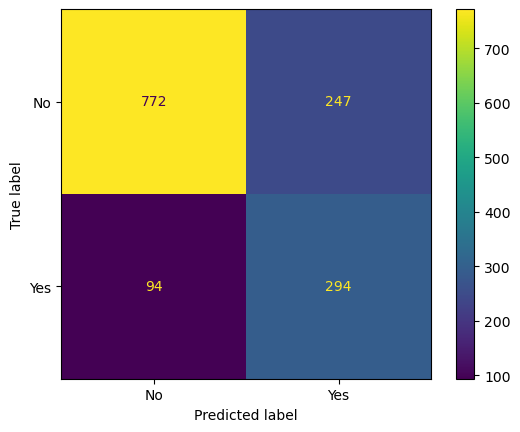

In [359]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm_grid_svc_top7, display_labels=grid_svc_top7.classes_)
disp.plot()
plt.show()

In [360]:
from sklearn.metrics import classification_report, accuracy_score as accuracy

print(classification_report(y_test_grid_svc_top7,y_pred_grid_svc_top7))

y_train_pred_grid_svc_top7 = grid_svc_top7.predict(X_train_grid_svc_top7)

test_score=accuracy(y_pred_grid_svc_top7, y_test_grid_svc_top7)
train_score=accuracy(y_train_grid_svc_top7, y_train_pred_grid_svc_top7)
print(f"test accuracy score is {test_score}")
print(f"train accuracy score is {train_score}")

              precision    recall  f1-score   support

          No       0.89      0.76      0.82      1019
         Yes       0.54      0.76      0.63       388

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.76      0.77      1407

test accuracy score is 0.757640369580668
train accuracy score is 0.7607111111111111


### Insights:

- Overall :
  - **Accuracy Score** : 76% accuracy, with weighted average F1-score of 0.71 suggests the model is balanced and performs well across both classes.
  - There might be a trade-off between precision and recall for the churn class.
    - For **Churn Prediction** 'Yes' Label (Churn Class):
      - **High Recall Score** 0.76 - Low False Negative, meanning that only small amount (24%) of actual churners are falsely predicted as non-churner. But it correctly capturing 84% of the customers who truly churned.
      - **Low precision score** 0.54- Hight False Positive, meanning that 46% of predicted churn cases were incorrectly classified as churn when they were not in reality.

   - Recall for "Yes" is high, which is good for churn detection, but the low precision indicates a high false positive rate for churn predictions.

<function matplotlib.pyplot.show(close=None, block=None)>

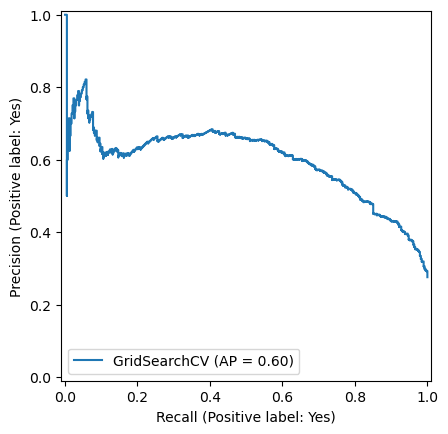

In [363]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(estimator=grid_svc_top7,X= X_test_grid_svc_top7, y=y_test_grid_svc_top7)
plt.show

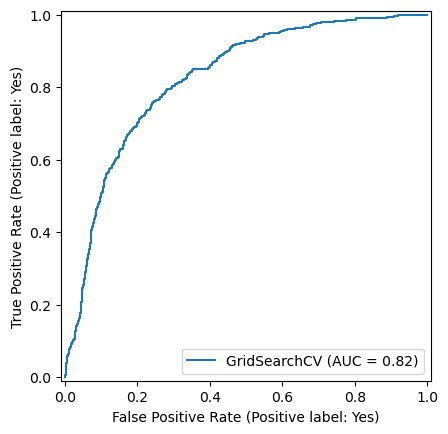

In [364]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(estimator=grid_svc_top7, X= X_test_grid_svc_top7, y=y_test_grid_svc_top7)
plt.show()

### Make a Prediction

In [366]:
# Extract 2 rows from test set
X_test_grid_svc_top7.iloc[2:4]

Tenure Months  Monthly Charges  Total Charges  CLTV        Contract  \
1564             13             98.0        1237.85  3714  Month-to-month   
5218             19             20.2         387.40  4821        Two year   

     Internet Service    Payment Method  
1564      Fiber optic  Electronic check  
5218               No      Mailed check

In [367]:
y_pred_grid_svc_top7_2 = grid_svc_top7.predict(X_test_grid_svc_top7.iloc[2:4])

In [368]:
# Predicted Churn Label
y_pred_grid_svc_top7_2

array(['Yes', 'No'], dtype=object)

In [369]:
# True Churn Label
y_test_grid_svc_top7[2:4]

1564    Yes
5218     No
Name: Churn Label, dtype: object

## 5.3. SVC With Top 12 features (Excluding Churn Score)

### Select Top 12 features (Excluding Churn Score) Based on Correlation

In [372]:
correlation_matrix_eda

Tenure Months  Monthly Charges  \
Tenure Months                                1.000000         0.246862   
Monthly Charges                              0.246862         1.000000   
Total Charges                                0.825880         0.651065   
Churn Score                                 -0.226379         0.133556   
CLTV                                         0.396188         0.098565   
Gender_Male                                  0.005285        -0.013779   
Senior Citizen_Yes                           0.015683         0.219874   
Partner_Yes                                  0.381912         0.097825   
Dependents_Yes                               0.133773        -0.142926   
Phone Service_Yes                            0.007877         0.248033   
Multiple Lines_No phone service             -0.007877        -0.248033   
Multiple Lines_Yes                           0.332399         0.490912   
Internet Service_Fiber optic                 0.017930         0.787195   
Internet Service_No                         -0.037529        -0.763191   
Online Security_No internet service         -0.037529        -0.763191   
Online Security_Yes                          0.328297         0.296447   
Online Backup_No internet service           -0.037529        -0.763191   
Online Backup_Yes                            0.361138         0.441529   
Device Protection_No internet service       -0.037529        -0.763191   
Device Protection_Yes                        0.361520         0.482607   
Tech Support_No internet service            -0.037529        -0.763191   
Tech Support_Yes                             0.325288         0.338301   
Streaming TV_No internet service            -0.037529        -0.763191   
Streaming TV_Yes                             0.280264         0.629668   
Streaming Movies_No internet service        -0.037529        -0.763191   
Streaming Movies_Yes                         0.285402         0.627235   
Contract_One year                            0.202338         0.004810   
Contract_Two year                            0.563801        -0.073256   
Paperless Billing_Yes                        0.004823         0.351930   
Payment Method_Credit card (automatic)       0.232800         0.030055   
Payment Method_Electronic check             -0.210197         0.271117   
Payment Method_Mailed check                 -0.232181        -0.376568   
Churn Label_Yes                             -0.354049         0.192858   

                                        Total Charges  Churn Score      CLTV  \
Tenure Months                                0.825880    -0.226379  0.396188   
Monthly Charges                              0.651065     0.133556  0.098565   
Total Charges                                1.000000    -0.124312  0.341837   
Churn Score                                 -0.124312     1.000000 -0.080837   
CLTV                                         0.341837    -0.080837  1.000000   
Gender_Male                                  0.000048    -0.000431 -0.007473   
Senior Citizen_Yes                           0.102411     0.101922 -0.003600   
Partner_Yes                                  0.319072    -0.110188  0.139616   
Dependents_Yes                               0.032184    -0.174869  0.059397   
Phone Service_Yes                            0.113008     0.023274  0.022792   
Multiple Lines_No phone service             -0.113008    -0.023274 -0.022792   
Multiple Lines_Yes                           0.469042     0.043061  0.133703   
Internet Service_Fiber optic                 0.360769     0.208264  0.010318   
Internet Service_No                         -0.374878    -0.145627 -0.011196   
Online Security_No internet service         -0.374878    -0.145627 -0.011196   
Online Security_Yes                          0.412619    -0.118814  0.138858   
Online Backup_No internet service           -0.374878    -0.145627 -0.011196   
Online Backup_Yes                            0.510100    -0.046769  0.139031   
Dev

In [373]:
absolute_correlation_f = correlation_matrix_eda.abs()
absolute_correlation_f['Churn Label_Yes'].sort_values(ascending=False)

Churn Label_Yes                           1.000000
Churn Score                               0.664970
Tenure Months                             0.354049
Internet Service_Fiber optic              0.307463
Contract_Two year                         0.301552
Payment Method_Electronic check           0.301455
Dependents_Yes                            0.248140
Device Protection_No internet service     0.227578
Internet Service_No                       0.227578
Streaming Movies_No internet service      0.227578
Streaming TV_No internet service          0.227578
Tech Support_No internet service          0.227578
Online Security_No internet service       0.227578
Online Backup_No internet service         0.227578
Total Charges                             0.199484
Monthly Charges                           0.192858
Paperless Billing_Yes                     0.191454
Contract_One year                         0.178225
Online Security_Yes                       0.171270
Tech Support_Yes               

Top 12 Features (Without Churn Score):
- Tenure Months, Internet Service, Contract, Payment Method, Dependents, Device Protection, Internet Service, Streaming Movies, Streaming TV, Tech Support, Online Security, Online Backup

### Prepare DataFrame With Top 12 features (Excluding Curn Score)

In [376]:
df_svc_top12 = df2[['Tenure Months', 'Internet Service', 'Contract', 'Payment Method', 'Dependents', 'Device Protection', 'Streaming Movies', 'Streaming TV', 'Tech Support', 'Online Security', 'Online Backup', 'Churn Label']]

In [377]:
df_svc_top12.reset_index(drop=True,inplace=True)

In [378]:
df_svc_top12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tenure Months      7032 non-null   int64 
 1   Internet Service   7032 non-null   object
 2   Contract           7032 non-null   object
 3   Payment Method     7032 non-null   object
 4   Dependents         7032 non-null   object
 5   Device Protection  7032 non-null   object
 6   Streaming Movies   7032 non-null   object
 7   Streaming TV       7032 non-null   object
 8   Tech Support       7032 non-null   object
 9   Online Security    7032 non-null   object
 10  Online Backup      7032 non-null   object
 11  Churn Label        7032 non-null   object
dtypes: int64(1), object(11)
memory usage: 659.4+ KB


In [379]:
df_svc_top12.columns

Index(['Tenure Months', 'Internet Service', 'Contract', 'Payment Method',
       'Dependents', 'Device Protection', 'Streaming Movies', 'Streaming TV',
       'Tech Support', 'Online Security', 'Online Backup', 'Churn Label'],
      dtype='object')

In [380]:
X_svc_top12 = df_svc_top12.drop('Churn Label',axis=1)
y_svc_top12 = df_svc_top12['Churn Label']

### Define GridSerachCV Parameters

In [382]:
param_grid_svc_top12 = {
    'svc__C': [0.001, 0.1, 0.5, 1],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto'],
    'svc__degree': [2, 3, 4]  # Applies if the model uses 'poly' kernel
}

### Define Pipeline 

In [384]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [385]:
cat_nominal = ['Internet Service', 'Payment Method', 'Dependents', 'Device Protection','Internet Service','Streaming Movies', 'Streaming TV', 'Tech Support', 'Online Security','Online Backup']

preprocessor_12 = ColumnTransformer(transformers=
                                 [('encoder_ordinal', OrdinalEncoder(categories=[np.sort(df.Contract.unique())]), ['Contract']),
                                 ('encoder_nominal', OneHotEncoder(drop='first'), cat_nominal)], 
                                 remainder='passthrough')


pipeline_grid_svc_top12 = Pipeline([
    ('preprocessor',preprocessor_12),
    ('scaler', StandardScaler()),
    ('svc', SVC(class_weight='balanced',random_state=101))
])

### Use GridSearchCV with Pipeline

In [387]:
from sklearn.model_selection import GridSearchCV

grid_svc_top12 = GridSearchCV(pipeline_grid_svc_top12, param_grid= param_grid_svc_top12 , cv=5, scoring='accuracy')

In [388]:
X_train_grid_svc_top12, X_test_grid_svc_top12, y_train_grid_svc_top12, y_test_grid_svc_top12 = train_test_split(X_svc_top12, y_svc_top12, test_size=0.2, random_state=101)

In [389]:
grid_svc_top12.fit(X_train_grid_svc_top12, y_train_grid_svc_top12)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder_ordinal',
                                                                         OrdinalEncoder(categories=[array(['Month-to-month', 'One year', 'Two year'], dtype=object)]),
                                                                         ['Contract']),
                                                                        ('encoder_nominal',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Internet '
                                                                          'Service',
                                                                          'Payment '
                                                                          'Method',
                                                                          'Dependents',
                                                                          'Device '
                                                                          'Protection',
                                                                          'Internet '
                                                                          'Service',
                                                                          'Streaming '
                                                                          'Movies',
                                                                          'Streaming '
                                                                          'TV',
                                                                          'Tech '
                                                                          'Support',
                                                                          'Online '
                                                                          'Security',
                                                                          'Online '
                                                                          'Backup'])])),
                                       ('scaler', StandardScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             param_grid={'svc__C': [0.001, 0.1, 0.5, 1],
                         'svc__degree': [2, 3, 4],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

### Best Parameters

In [391]:
grid_svc_top12.best_params_

{'svc__C': 1, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

### Evaluate Model

In [393]:
y_pred_grid_svc_top12 = grid_svc_top12.predict(X_test_grid_svc_top12)

In [394]:
from sklearn.metrics import confusion_matrix

cm_grid_svc_top12 = confusion_matrix(y_test_grid_svc_top12, y_pred_grid_svc_top12)
cm_grid_svc_top12

array([[750, 269],
       [ 76, 312]])

In [395]:
print('Confusion matrix\n\n', cm_grid_svc_top12)

print('\nTrue Positives(TP) = ', cm_grid_svc_top12[0,0])

print('\nTrue Negatives(TN) = ', cm_grid_svc_top12[1,1])

print('\nFalse Positives(FP) = ', cm_grid_svc_top12[0,1])

print('\nFalse Negatives(FN) = ', cm_grid_svc_top12[1,0])

Confusion matrix

 [[750 269]
 [ 76 312]]

True Positives(TP) =  750

True Negatives(TN) =  312

False Positives(FP) =  269

False Negatives(FN) =  76


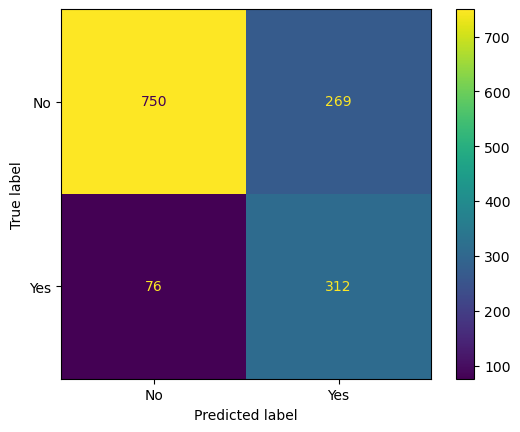

In [396]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm_grid_svc_top12, display_labels=grid_svc_top12.classes_)
disp.plot()
plt.show()

In [397]:
from sklearn.metrics import classification_report, accuracy_score as accuracy

print(classification_report(y_test_grid_svc_top12,y_pred_grid_svc_top12))

y_train_pred_grid_svc_top12 = grid_svc_top12.predict(X_train_grid_svc_top12)

test_score=accuracy(y_pred_grid_svc_top12, y_test_grid_svc_top12)
train_score=accuracy(y_train_grid_svc_top12, y_train_pred_grid_svc_top12)
print(f"test accuracy score is {test_score}")
print(f"train accuracy score is {train_score}")

              precision    recall  f1-score   support

          No       0.91      0.74      0.81      1019
         Yes       0.54      0.80      0.64       388

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.75      0.77      1407

test accuracy score is 0.7547974413646056
train accuracy score is 0.7623111111111112


- Overall :
  - **Accuracy Score** : 75% accuracy, with weighted average F1-score of 0.75 suggests the model is balanced and performs well across both classes.
  - There might be a trade-off between precision and recall for the churn class.
    - For **Churn Prediction** 'Yes' Label (Churn Class):
      - **High Recall Score** 0.80 - Low False Negative, meanning that only small amount (20%) of actual churners are falsely predicted as non-churner. But it correctly capturing 80% of the customers who truly churned.
      - **Low precision score** 0.54- Hight False Positive, meanning that 46% of predicted churn cases were incorrectly classified as churn when they were not in reality.

   - Recall for "Yes" is high, which is good for churn detection, but the low precision indicates a high false positive rate for churn predictions.

<function matplotlib.pyplot.show(close=None, block=None)>

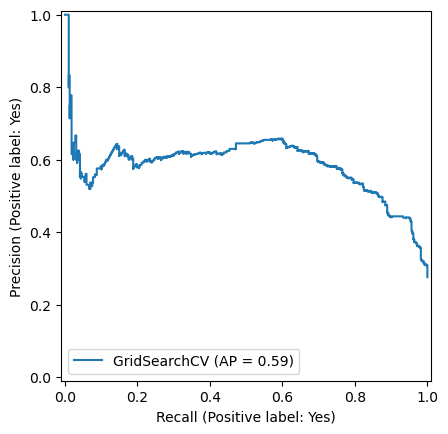

In [399]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(estimator=grid_svc_top12,X= X_test_grid_svc_top12, y=y_test_grid_svc_top12)
plt.show

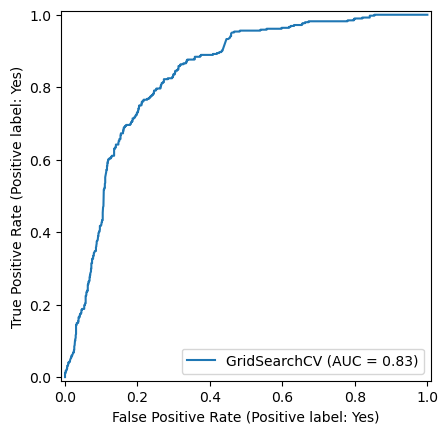

In [400]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(estimator=grid_svc_top12, X= X_test_grid_svc_top12, y=y_test_grid_svc_top12)
plt.show()

### Make a Prediction

In [402]:
#Extract 2 rows from test set
X_test_grid_svc_top12.iloc[2:4]

Tenure Months Internet Service        Contract    Payment Method  \
1564             13      Fiber optic  Month-to-month  Electronic check   
5218             19               No        Two year      Mailed check   

     Dependents    Device Protection     Streaming Movies  \
1564         No                  Yes                  Yes   
5218        Yes  No internet service  No internet service   

             Streaming TV         Tech Support      Online Security  \
1564                  Yes                   No                   No   
5218  No internet service  No internet service  No internet service   

            Online Backup  
1564                  Yes  
5218  No internet service

In [403]:
#Predict
y_pred_grid_svc_top12_2 = grid_svc_top12.predict(X_test_grid_svc_top12.iloc[2:4])

In [404]:
#Predicted Churn Label
y_pred_grid_svc_top12_2

array(['Yes', 'No'], dtype=object)

In [405]:
#True Churn Label
y_test_grid_svc_top12.iloc[2:4]

1564    Yes
5218     No
Name: Churn Label, dtype: object

# Part 4: Best Model + Summary

Based on the above anaysis on different models with different feature selection, it is concluded that:
<br/><br/>
**A. In scenarios where the 'churn score' is available :**

- **Logistic Regression Model**:
    - When all features data, including churn score, are available, the Logistic Regression model with 5 numercial features + top 5 categorical features performs the best in terms of accuracy (92%) and does not suggest overfitting.
    - It also presents balanced and strong performance metrics for Precision and Recall. For 'Yes(Churn)'class, Recall (86%) and Precision 86%); For 'No'class, Recall (94%)  and Recision(94%).
    - Additionally, logistic model is generally less computational expensive than other models.
<br/><br/>
- **Decision Tree Model**:
    - Having said that , if your primary focus is on the highest recall score. Decision Tree model with Entropy criterion + top 4 features would be a good fit.
    - It performs the best in terms of 'Yes(Churn)' class Recall  (96%), though there is a trade-off in Precision (75%). 
    - This model also maintains high accuracy (90%) without overfitting.
    - Furthermore, it is rather computationally efficient with only considering 4 top features.

**B. In scenarios where the 'churn score' is unavailable** : 

- **Logistic Regression Model**:
    - 8 features:
      - 'Tenure Months', Monthly Charges', 'Total Charges', 'Dependents, 'Internet Service' ,'Streaming Movies', 'Contract, 'Payment Method'
    - the best model in terms of accuracy and does not suggest overfitting.
    - Its accuracy: 81%
    - For 'Yes(Churn)'class, Recall (61%) and Precision (69%); For 'No'class, Recall (89%) and Recision(85%).
<br/><br/>
- **Decision Tree Model**:
    - In scenarios where top priority is on highest Recall, a Decision Tree Model with Entropy crition +top 6 features is a viable option:
    - 6 Features:
      - 'Tenure Months','Internet Service','Contract','Payment Method','Dependents','Internet Service'
    - Its accuracy: 72%
    - For 'Yes(Churn)'class, Recall (79%) and Precision (50%); For 'No'class, Recall (69%) and Recision(89%).
<br/><br/>   
- **Support Vector Machine**:
    - In scenarios where top priority is on highest Recall, a Support Vector Classifier with the top 7 features can also be considered:
    - 7 features:
      - 'Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV', 'Contract','Internet Service', 'Payment Method'
    - Its accuracy: 76%
    - For 'Yes(Churn)'class, Recall (76%) and Precision (54%); For 'No'class, Recall (76%) and Recision(89%).

**Further Insights**:
- The churn score has been proven to be a significant feature for clear separation in churn classification, as highlighted in both the pairplot and 3D visualizations. This feature enhances model clarity and accuracy across the analyses. But when 'Churn Score' is unavailablke, the models we haven mentioned performs fairly good as well.

<br></br>
<center> - This End - </center>
<br></br>